<a href="https://colab.research.google.com/github/pawljmlo/dawid-phd/blob/main/scoping-review-analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# old

In [ ]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

from matplotlib import pyplot as plt

import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving disorders.csv to disorders.csv
User uploaded file "disorders.csv" with length 125 bytes


In [ ]:
df = pd.read_csv('dawid-phd-data-extracted.csv')
df.head()

Kolumna1  emotional/empathy/understanding  ...    original     changed
0  Andalibi 2017                                1  ...  depression  depression
1    Barney 2011                                0  ...  depression  depression
2      Beck 2016                                1  ...  depression  depression
3      Bronstein                                0  ...         OCD         OCD
4     Brown 2014                                0  ...      opioid      opioid

[5 rows x 56 columns]

## all

In [ ]:
X = df.drop(['Kolumna1', 'Choroba', 'original', 'changed'], axis=1).values
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
kmeans.labels_

array([5, 0, 3, 0, 0, 1, 1, 3, 3, 1, 0, 2, 2, 5, 0, 5, 0, 1, 1, 1, 5, 0,
       1, 2, 6, 6, 6, 5, 5, 5, 2, 2, 0, 0, 7, 2, 5, 5, 4, 4], dtype=int32)

In [ ]:
y = df['Choroba'].values
y

array([1, 1, 1, 2, 4, 4, 6, 8, 5, 1, 8, 6, 8, 4, 1, 6, 1, 6, 6, 1, 4, 6,
       1, 4, 1, 3, 8, 1, 2, 2, 2, 8, 8, 8, 6, 4, 6, 6, 1, 2])

In [ ]:
col_names = df.drop(['Kolumna1', 'Choroba', 'original', 'changed'], axis=1).columns
class_names = ['1','2','3','4','5','6','8']

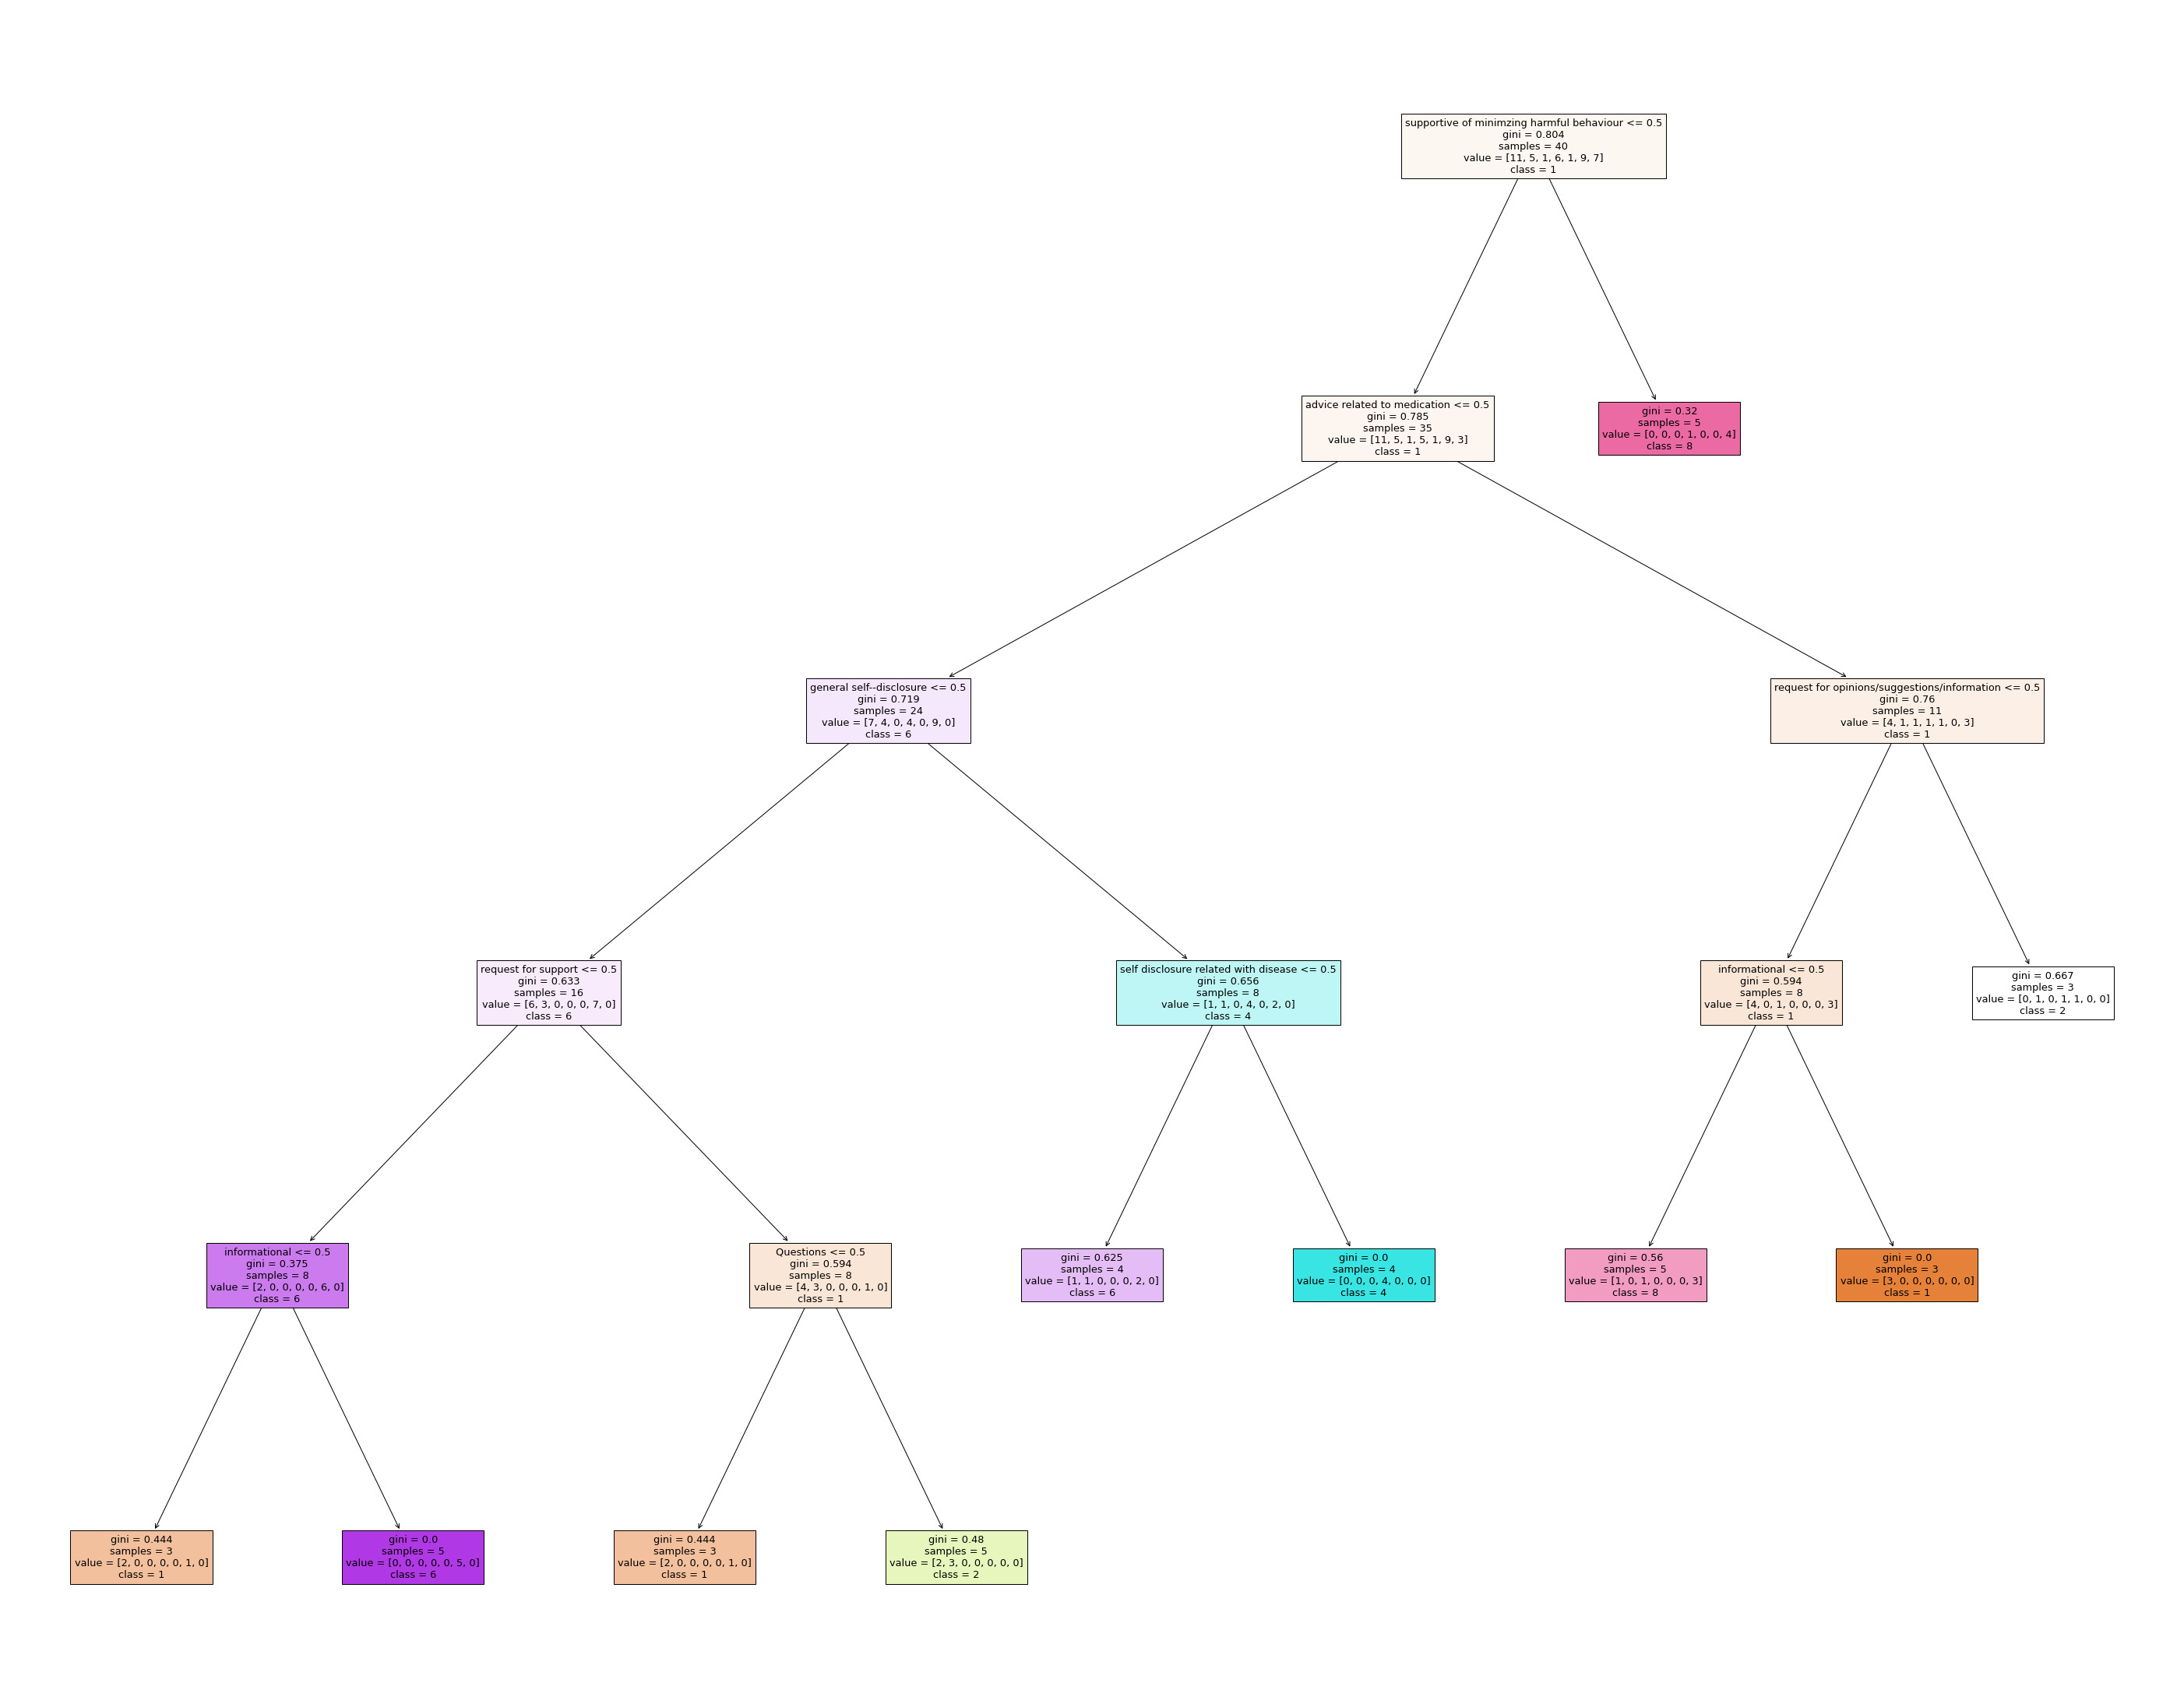

In [ ]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=3)
clf = clf.fit(X, y)

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf, 
                   feature_names=col_names,  
                   class_names=class_names,
                   filled=True)

## selected

In [ ]:
df_select = df[(df['Choroba'] != 3) & (df['Choroba'] != 5)]
df_select.head()

Kolumna1  emotional/empathy/understanding  ...    original     changed
0  Andalibi 2017                                1  ...  depression  depression
1    Barney 2011                                0  ...  depression  depression
2      Beck 2016                                1  ...  depression  depression
3      Bronstein                                0  ...         OCD         OCD
4     Brown 2014                                0  ...      opioid      opioid

[5 rows x 56 columns]

In [ ]:
X_selected = df_select.drop(['Kolumna1', 'Choroba', 'original', 'changed'], axis=1).values
kmeans = KMeans(n_clusters=8, random_state=0).fit(X_selected)
kmeans.labels_

array([4, 5, 3, 5, 5, 4, 5, 3, 3, 7, 3, 0, 4, 5, 3, 5, 3, 5, 5, 4, 5, 7,
       6, 1, 1, 4, 4, 4, 3, 0, 0, 0, 4, 0, 7, 7, 2, 2], dtype=int32)

In [ ]:
y_selected = df_select['Choroba'].values
y

array([1, 1, 1, 2, 4, 4, 6, 8, 1, 8, 6, 8, 4, 1, 6, 1, 6, 6, 1, 4, 6, 1,
       4, 1, 8, 1, 2, 2, 2, 8, 8, 8, 6, 4, 6, 6, 1, 2])

In [ ]:
col_names = df.drop(['Kolumna1', 'Choroba', 'original', 'changed'], axis=1).columns
class_names_selected = ['1','2','4','6','8']

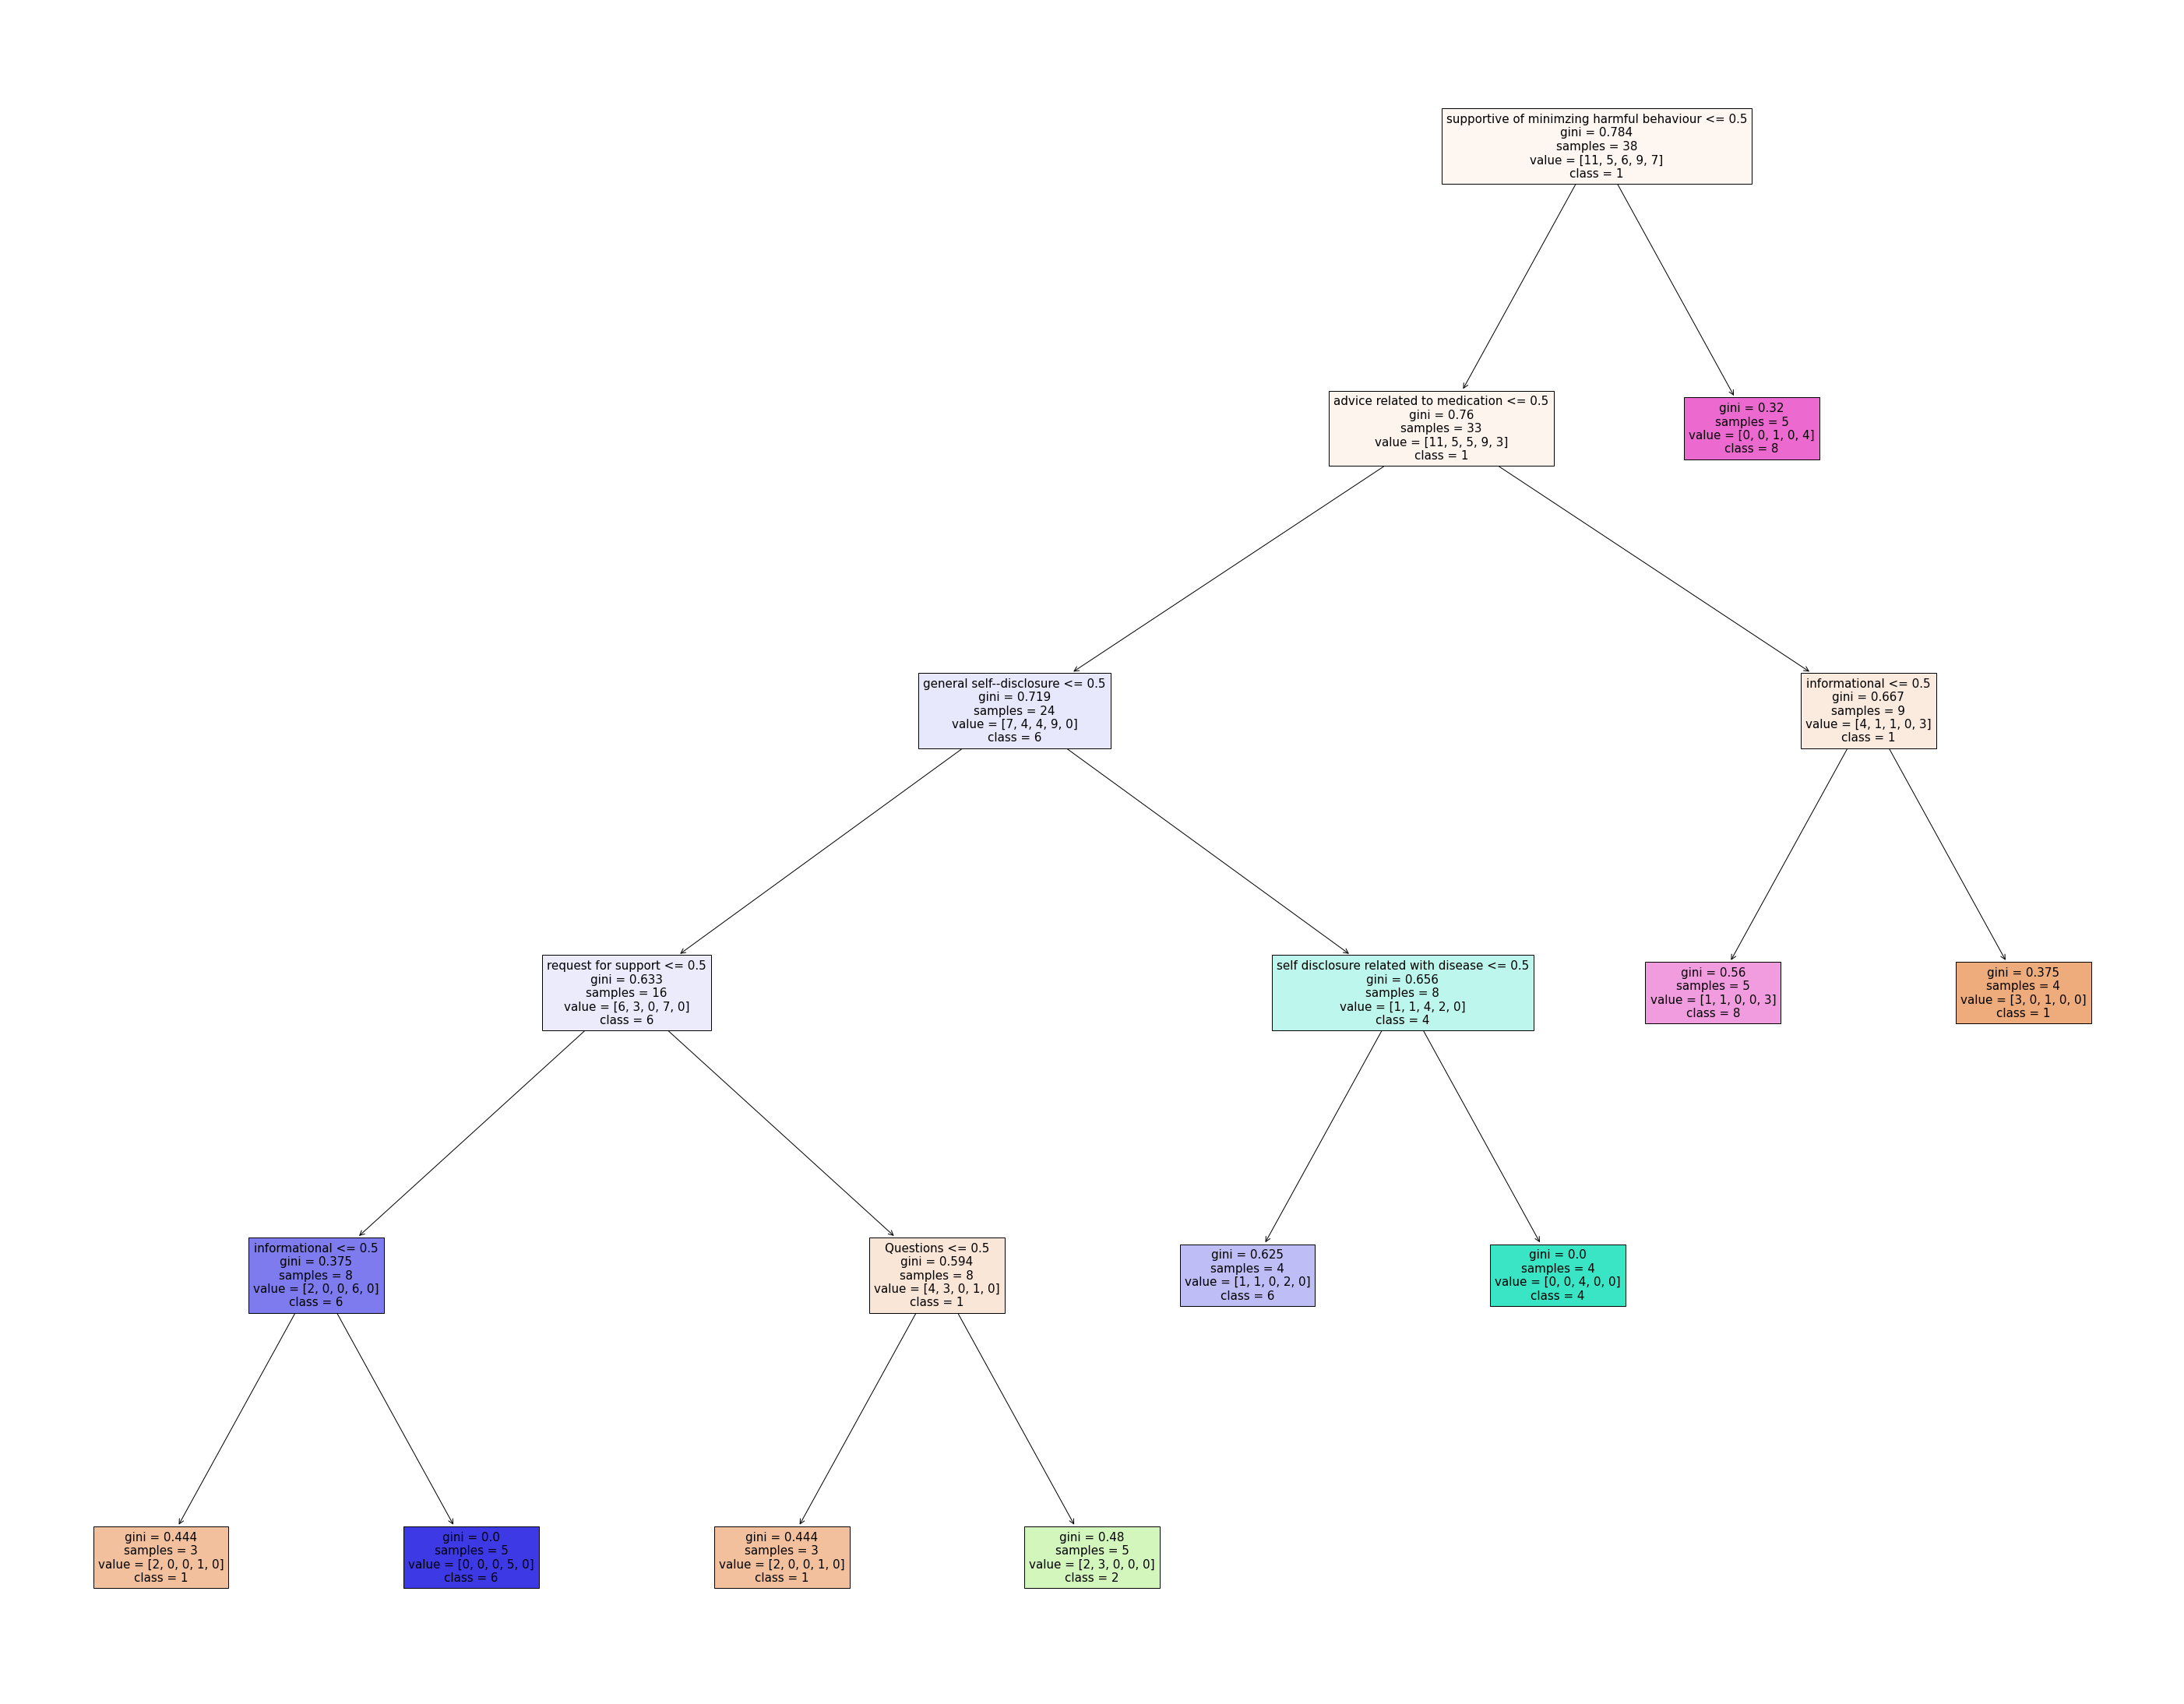

In [ ]:
clf = DecisionTreeClassifier(random_state=0, min_samples_leaf=3)
clf = clf.fit(X_selected, y_selected)

fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(clf, 
                   feature_names=col_names,  
                   class_names=class_names_selected,
                   filled=True)

## heatmaps

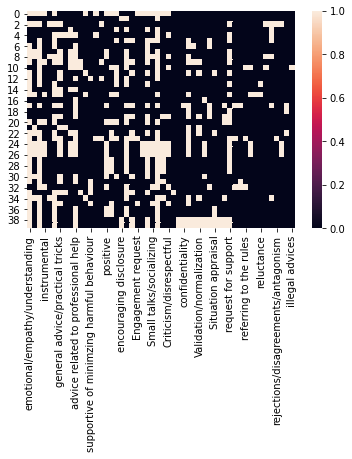

In [ ]:
ax = sns.heatmap(df.drop(['Kolumna1', 'Choroba', 'original', 'changed'], axis=1))

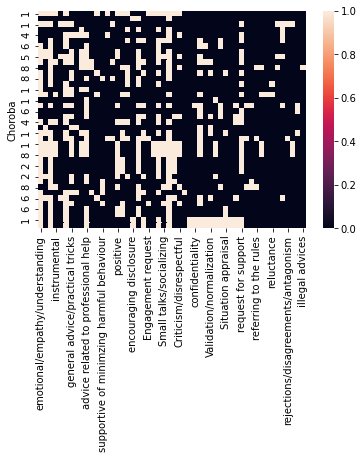

In [ ]:
ax = sns.heatmap(df.drop(['Kolumna1', 'original', 'changed'], axis=1).set_index('Choroba'))

In [ ]:
df_grouped = df.drop(['Kolumna1', 'original', 'changed'], axis=1).groupby('Choroba').sum()
df_grouped 

emotional/empathy/understanding  esteem  ...  unhelpful  illegal advices
Choroba                                           ...                            
1                                      8       4  ...          1                0
2                                      4       1  ...          0                0
3                                      1       1  ...          0                0
4                                      4       0  ...          0                0
5                                      1       1  ...          0                0
6                                      7       3  ...          2                0
8                                      5       2  ...          0                1

[7 rows x 52 columns]

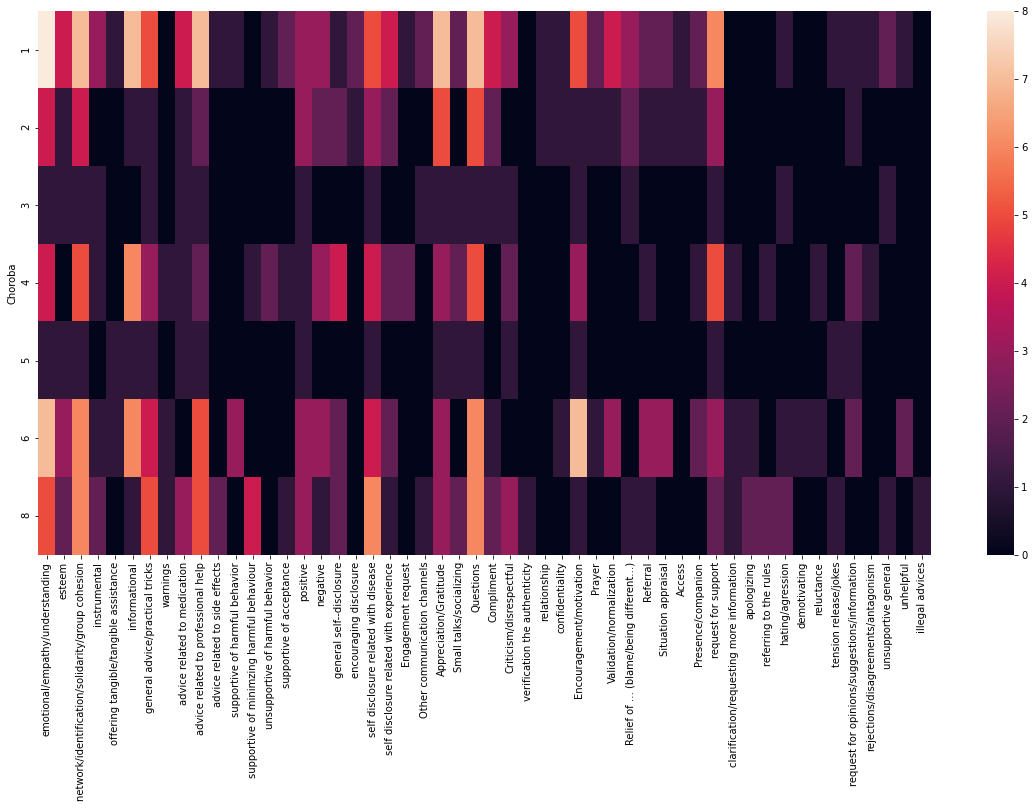

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_grouped)

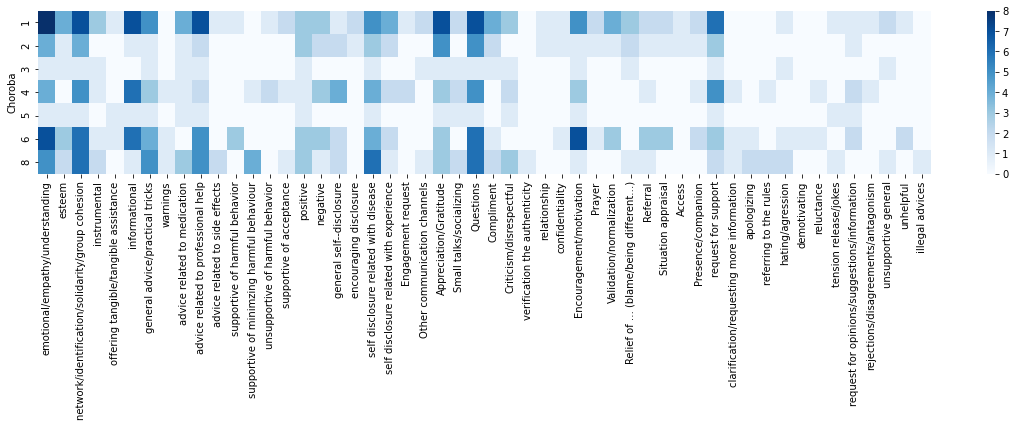

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax = sns.heatmap(df_grouped, cmap="Blues")

In [ ]:
df_grouped_mean = df.drop(['Kolumna1', 'original', 'changed'], axis=1).groupby('Choroba').mean()

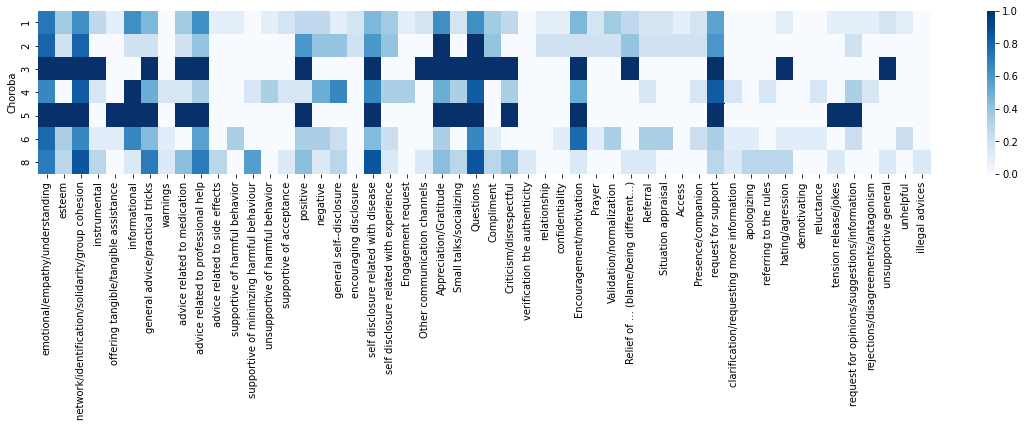

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax = sns.heatmap(df_grouped_mean, cmap="Blues")

In [ ]:
df_exluded = df[(df['Choroba'] != 3) & (df['Choroba'] != 5)]
df_exluded_mean = df_exluded.drop(['Kolumna1', 'original', 'changed'], axis=1).groupby('Choroba').mean()

In [ ]:
df_exluded_mean

emotional/empathy/understanding    esteem  ...  unhelpful  illegal advices
Choroba                                             ...                            
1                               0.727273  0.363636  ...   0.090909         0.000000
2                               0.800000  0.200000  ...   0.000000         0.000000
4                               0.666667  0.000000  ...   0.000000         0.000000
6                               0.777778  0.333333  ...   0.222222         0.000000
8                               0.714286  0.285714  ...   0.000000         0.142857

[5 rows x 52 columns]

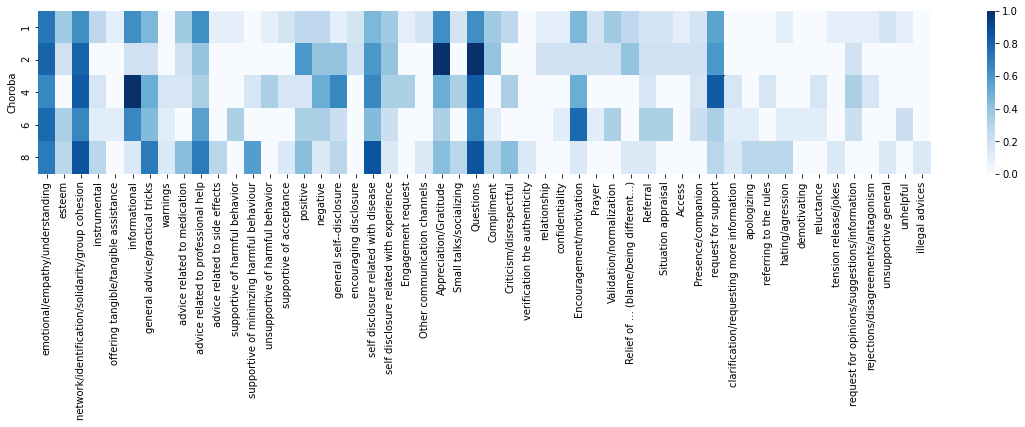

In [ ]:
fig, ax = plt.subplots(figsize=(20, 3))
ax = sns.heatmap(df_exluded_mean, cmap="Blues")

# new

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
!pip freeze | grep scikit

scikit-image==0.16.2
scikit-learn==0.22.2.post1


In [ ]:
sns.color_palette("Set2", 9)[5] # żółty
sns.color_palette()[4] #red
sns.color_palette("husl", 9)[3] #zielony
sns.color_palette("husl", 9)[6] #niebieski

(0.23299120924703914, 0.639586552066035, 0.9260706093977744)

In [2]:
path_codes = "/content/drive/MyDrive/projekty/dawid-phd/scoping-review/data-p2p/codes.csv"
path_casp_single = "/content/drive/MyDrive/projekty/dawid-phd/scoping-review/data-p2p/casp-single-studies.csv"
path_casp_items = "/content/drive/MyDrive/projekty/dawid-phd/scoping-review/data-p2p/casp-items.csv"
path_graph_color = "/content/drive/MyDrive/projekty/dawid-phd/scoping-review/data-p2p/graph-colors.csv"

## heatmaps

In [ ]:
df_heatmap = pd.read_csv(path_codes)
df_heatmap.head()

ID  instrumental  ...  disorders-v4  disorders-v5
0   Andalibi 2017             1  ...    depression           DEP
1     Barney 2011             0  ...    depression           DEP
2       Beck 2016             0  ...    depression           DEP
3  Bronstein 2014             0  ...           OCD           OCD
4      Brown 2014             0  ...    addictions           PSU

[5 rows x 50 columns]

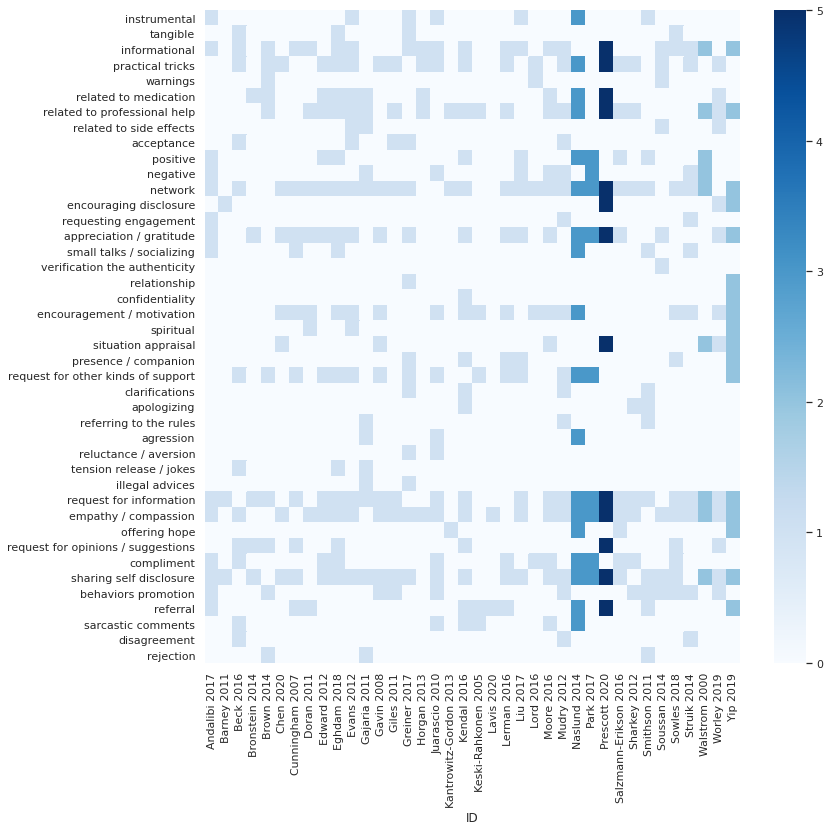

In [ ]:
sns.set(font_scale=1, style='white')

fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(df_heatmap.drop(['illness-num'], axis=1).groupby('ID').sum().transpose(), cmap="Blues")

#### grouped by disorders (means, sums)

In [ ]:
df_heatmap_changed = df_heatmap.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'illness-num'], axis=1).groupby('disorders-v5').sum().transpose()

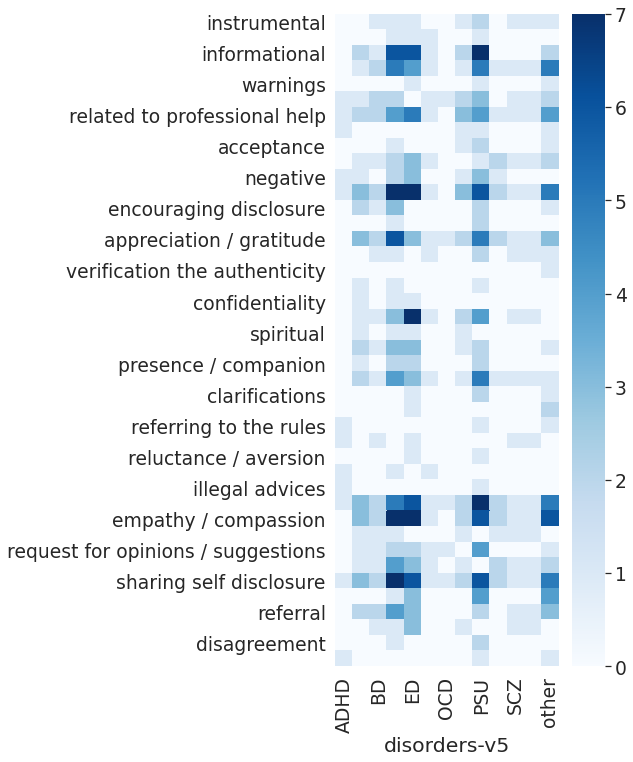

In [ ]:
fig, ax = plt.subplots(figsize=(5, 12))
ax = sns.heatmap(df_heatmap_changed, cmap="Blues")

#### grouped by disorders (means, sums) - labels above and below

In [ ]:
df_heatmap_new = df_heatmap.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'illness-num'], axis=1).groupby('disorders-v5').mean().transpose()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 26 Text major ticklabel objects>)

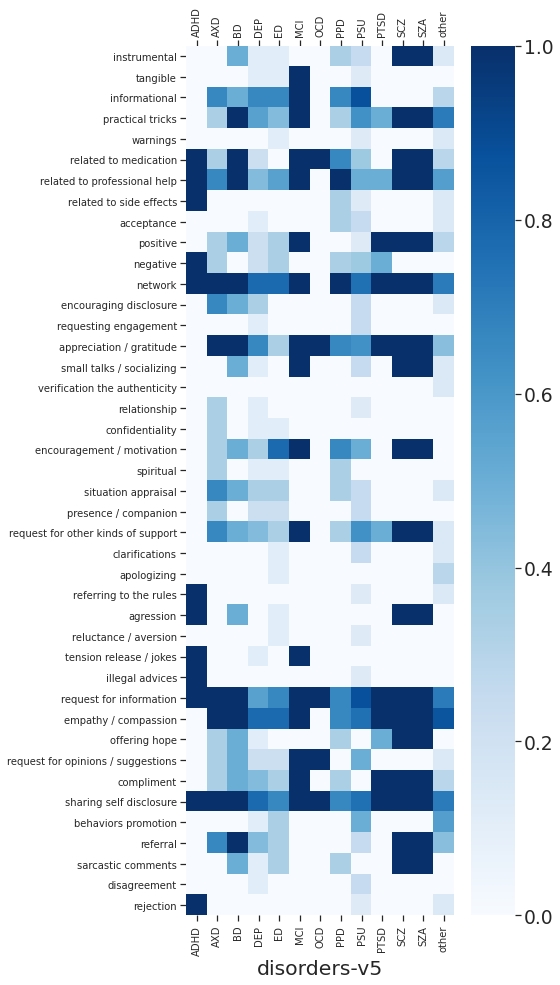

In [ ]:
sns.set(font_scale=1.7, style='white')

fig, ax = plt.subplots(figsize=(6, 16))
ax = sns.heatmap(df_heatmap_new, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)

#### all studies without duplicates

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]),
 <a list of 76 Text major ticklabel objects>)

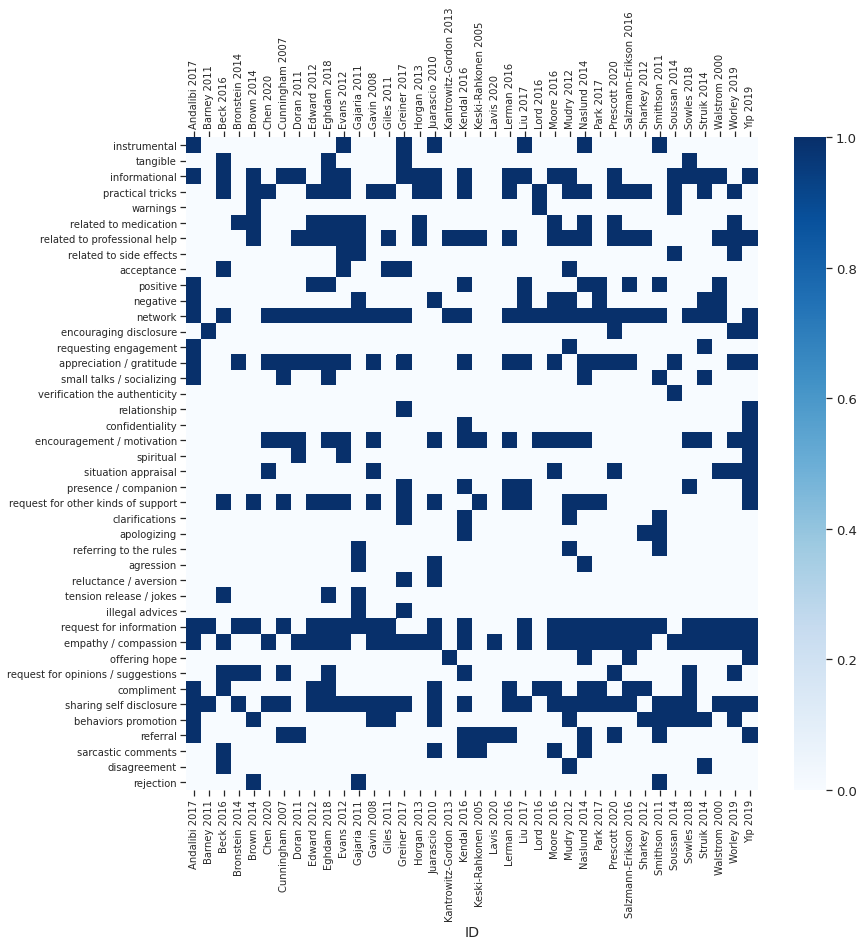

In [ ]:
sns.set(font_scale=1.2, style='white')

fig, ax = plt.subplots(figsize=(12.8, 12))
ax = sns.heatmap(df_heatmap.drop_duplicates(subset=['ID']).set_index('ID').drop(
    ['illness-num', 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5'], axis=1).transpose(), cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)

#### indivual studies (sums, means)

Caution: Walstrom occurrs twice for ED!

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 14 Text major ticklabel objects>)

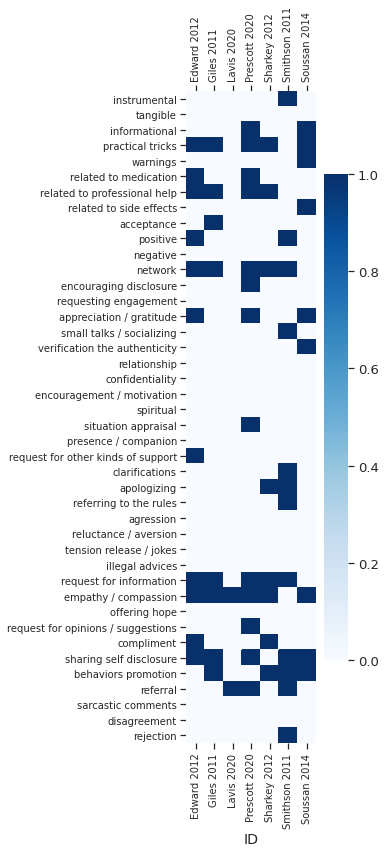

In [ ]:
sns.set(font_scale=1.2, style='white')

fig, ax = plt.subplots(figsize=(2.9, 12))
ax = sns.heatmap(df_heatmap[df_heatmap['disorders-v5']=="other"].set_index('ID').drop(
    ['illness-num', 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5'], axis=1).transpose(), cmap="Blues")
# ax = sns.heatmap(df_heatmap[df_heatmap['disorders-v5']=="ED"].drop_duplicates(subset=['ID']).set_index('ID').drop(
#     ['illness-num', 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5'], axis=1).transpose(), cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90) 

#### disorders as numbers

In [ ]:
df_heatmap_num = df_heatmap.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5'], axis=1).groupby('illness-num').sum().transpose()

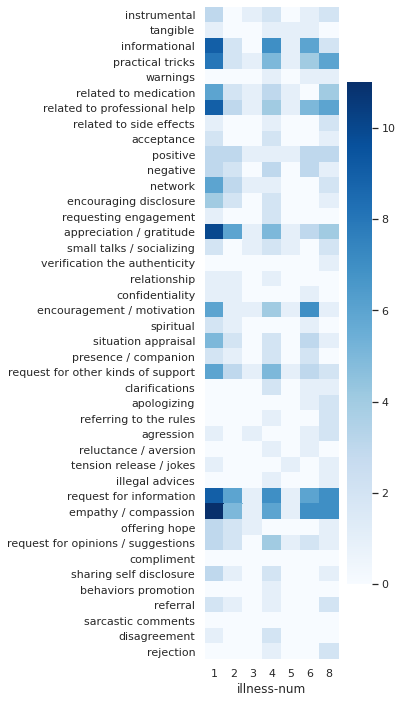

In [ ]:
fig, ax = plt.subplots(figsize=(3, 12))
ax = sns.heatmap(df_heatmap_num, cmap="Blues")

## disorders

In [ ]:
df_disorders = (df_heatmap.groupby('disorders-v5').count()['ID'] / df_heatmap.groupby('disorders-v5').count()['ID'].sum() * 100).to_frame()
df_disorders = df_disorders.reset_index()

df_disorders.columns = ['Disorders', 'Percentage']

df_disorders = df_disorders.sort_values('Percentage', ascending=False)

df_disorders = df_disorders.reset_index(drop=True)

In [ ]:
def shift_row_to_bottom(df, index_to_shift):
  """Shift row, given by index_to_shift, to bottom of df."""
  
  idx = df.index.tolist()
  idx.pop(index_to_shift)
  df = df.reindex(idx + [index_to_shift])
  
  return df


def shift_row_to_top(df, index_to_shift):
  """Shift row, given by index_to_shift, to top of df."""
  
  idx = df.index.tolist()
  idx.pop(index_to_shift)
  df = df.reindex([index_to_shift] + idx)
  
  return df

In [ ]:
df_disorders = shift_row_to_bottom(df_disorders, 3)
df_disorders

Disorders  Percentage
0        DEP   18.750000
1         ED   18.750000
2        PSU   16.666667
4        AXD    6.250000
5        PPD    6.250000
6         BD    4.166667
7       PTSD    4.166667
8       ADHD    2.083333
9        MCI    2.083333
10       OCD    2.083333
11       SCZ    2.083333
12       SZA    2.083333
3      other   14.583333

In [ ]:
## from path

# df_illnesses = pd.read_csv('disorders.csv', sep=";", na_filter=False, decimal=",")
# # df_illnesses = df_illnesses.sort_values("percentage", ascending=False)
# df_illnesses

[(0.0, 18.75)]

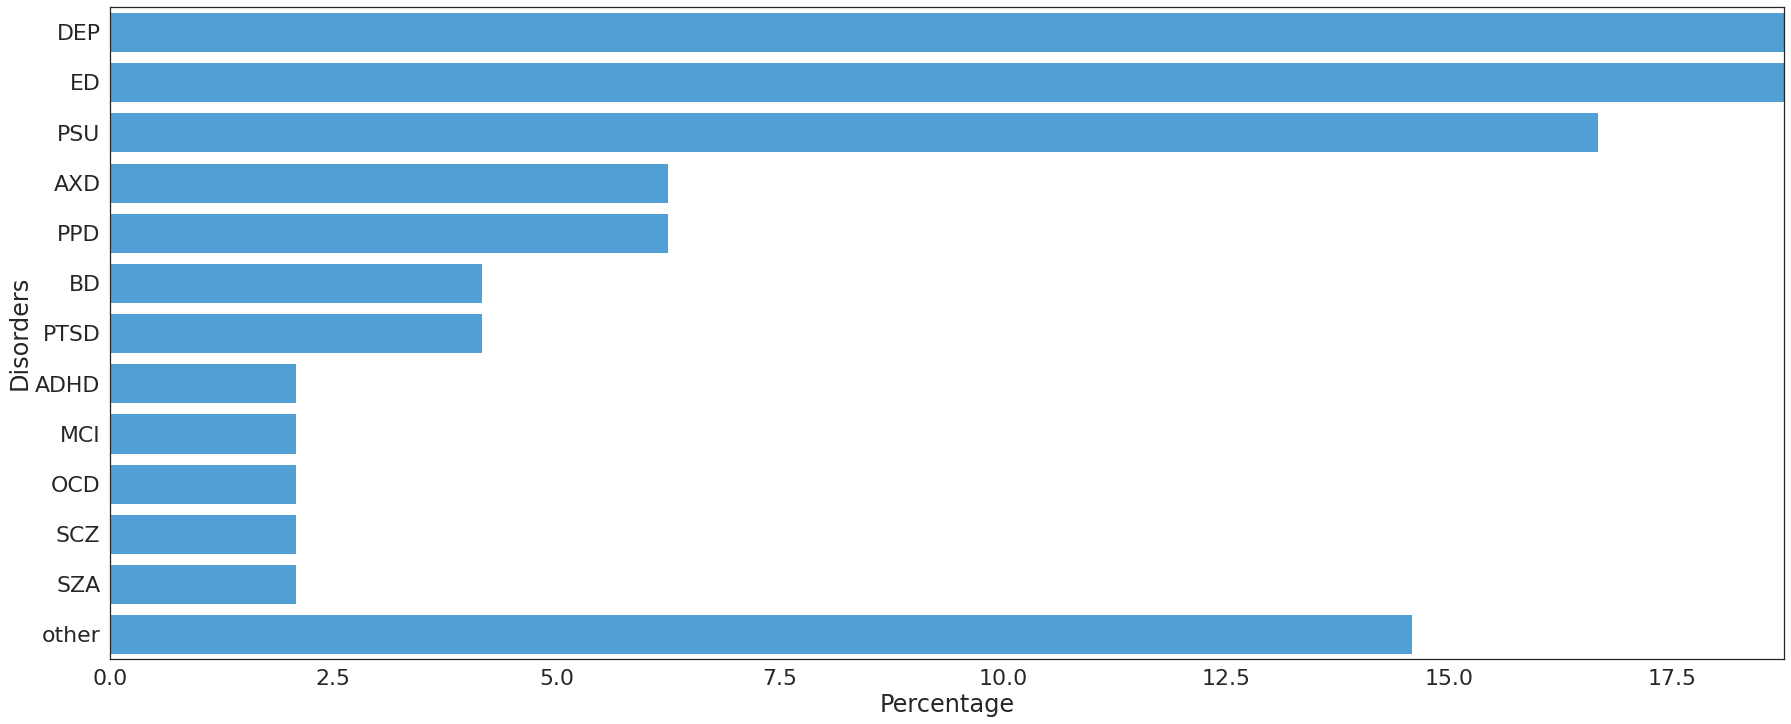

In [ ]:
plt.figure(figsize=(30, 12))
sns.set(font_scale=2, style='white')

ax = sns.barplot(y="Disorders", x="Percentage", data=df_disorders, color=sns.color_palette("husl", 9)[6])
ax.set(xlim=(0,18.75))

## casp

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### items

In [ ]:
df_casp = pd.read_csv(path_casp_items, na_filter=False)
# df_casp.index = df_casp["Answers"]
# df_casp = df_casp.drop("Answers", axis=1)
df_casp = df_casp.transpose()
df_casp = df_casp.reset_index()

new_header = df_casp.iloc[0] #grab the first row for the header
df_casp = df_casp[1:] #take the data less the header row
df_casp.columns = new_header #set the header row as the df header

df_casp

0  Answers Yes  No Can't tell  NA
1        1  35   3          0   0
2        2  38   0          0   0
3        3  32   1          5   0
4        4   5   0          3  30
5        5  35   0          3   0
6        6   3   5          3  27
7        7  32   4          2   0
8        8  23   8          7   0
9        9  34   4          0   0
10     10a  38   0          0   0
11     10b  32   6          0   0
12     10c  15  23          0   0

In [ ]:
no_studies = 38

In [ ]:
df_casp["NA_changed"] = 100
df_casp["No_changed"] = (df_casp["No"] + df_casp["Can't tell"] + df_casp["Yes"]) * 100/no_studies
df_casp["Can't tell_changed"] = (df_casp["Can't tell"] + df_casp["Yes"]) * 100/no_studies
df_casp["Yes_changed"] = df_casp["Yes"] * 100/no_studies

In [ ]:
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [ ]:
sns.set(font_scale=2, style='white')

[(0.0, 100.0)]

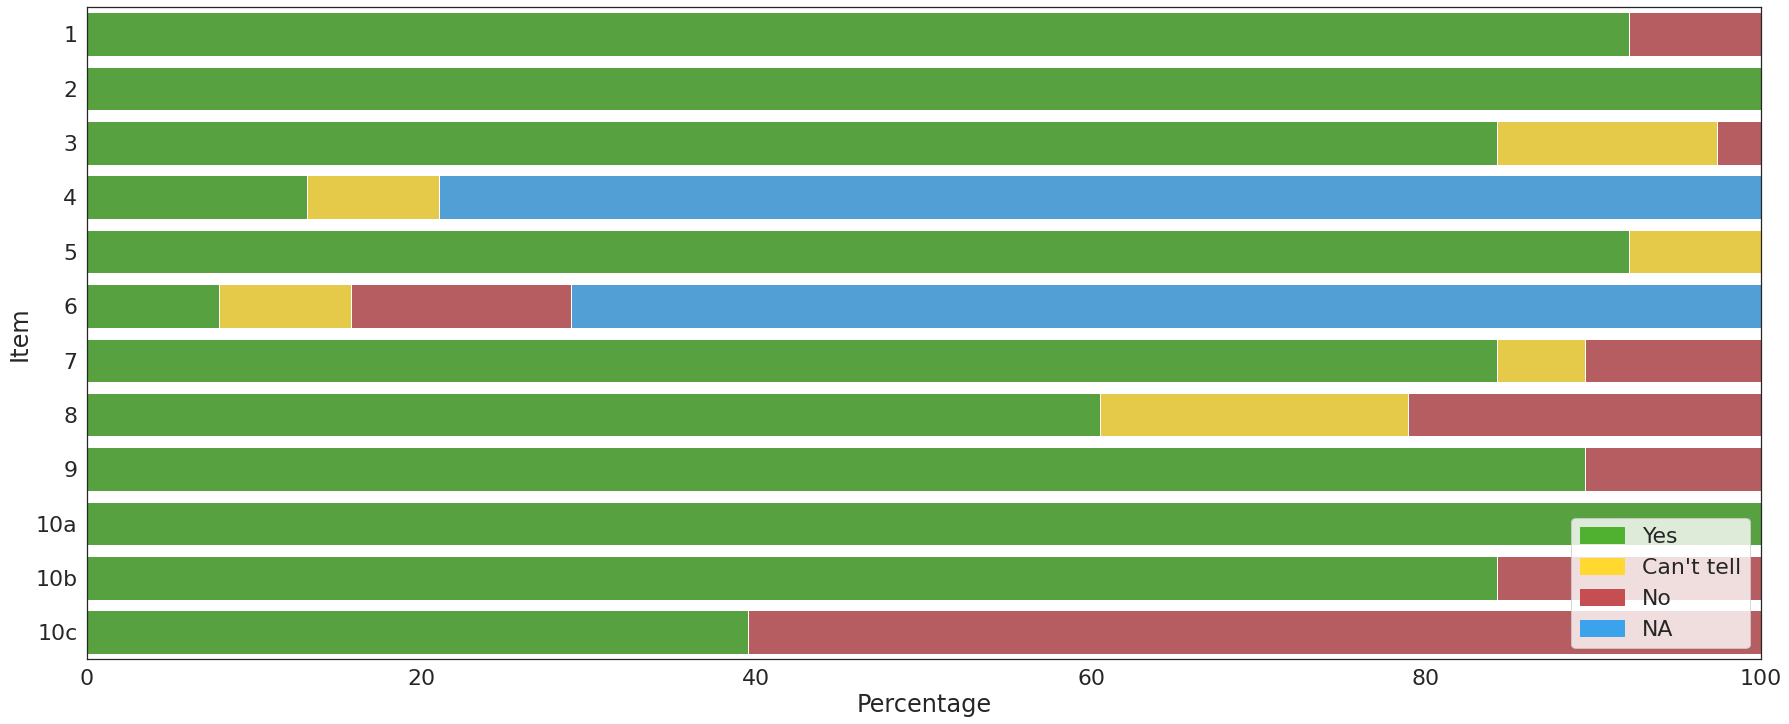

In [ ]:
plt.figure(figsize=(30, 12))

# sns.color_palette("pastel")

bar4 = sns.barplot(y="Answers", x="NA_changed", data=df_casp, color=sns.color_palette("husl", 9)[6])
bar2 = sns.barplot(y="Answers", x="No_changed", data=df_casp, color=sns.color_palette()[3])
bar3 = sns.barplot(y="Answers", x="Can't tell_changed", data=df_casp, color=sns.color_palette("Set2", 9)[5])
ax = bar1 = sns.barplot(y="Answers", x="Yes_changed", data=df_casp, color=sns.color_palette("husl", 9)[3])

sns.color_palette("Set2", 9)[5] # żółty
sns.color_palette()[3] #red
sns.color_palette("husl", 9)[3] #zielony
sns.color_palette("husl", 9)[6] #niebieski

leg_bar1 = mpatches.Patch(color=sns.color_palette("husl", 9)[3], label='Yes')
leg_bar2 = mpatches.Patch(color=sns.color_palette()[3], label='No')
leg_bar3 = mpatches.Patch(color=sns.color_palette("Set2", 9)[5], label='Can\'t tell')
leg_bar4 = mpatches.Patch(color=sns.color_palette("husl", 9)[6], label='NA')

plt.legend(handles=[leg_bar1, leg_bar3, leg_bar2, leg_bar4], loc='lower right')
# plt.legend()
ax.set(xlabel='Percentage', ylabel='Item',)
ax.set(xlim=(0,100))

### single studies

In [ ]:
df_casp_studies = pd.read_csv(path_casp_single, na_filter=False)
df_casp_studies.head()

ID  Yes  No  Can't tell  NA
0   Andalibi 2017   11   0           0   1
1     Barney 2011   11   1           0   0
2        Yip 2019    9   1           0   2
3       Beck 2016    9   1           0   2
4  Bronstein 2014    7   3           0   2

In [ ]:
df_casp_studies["NA_changed"] = 100
df_casp_studies["No_changed"] = (df_casp_studies["No"] + df_casp_studies["Can't tell"] + df_casp_studies["Yes"]) * 100/12
df_casp_studies["Can't tell_changed"] = (df_casp_studies["Can't tell"] + df_casp_studies["Yes"]) * 100/12
df_casp_studies["Yes_changed"] = df_casp_studies["Yes"] * 100/12

In [ ]:
df_casp_studies

ID  Yes  ...  Can't tell_changed  Yes_changed
0            Andalibi 2017   11  ...           91.666667    91.666667
1              Barney 2011   11  ...           91.666667    91.666667
2                 Yip 2019    9  ...           75.000000    75.000000
3                Beck 2016    9  ...           75.000000    75.000000
4           Bronstein 2014    7  ...           58.333333    58.333333
5               Brown 2014   10  ...           83.333333    83.333333
6                Chen 2020    6  ...           66.666667    50.000000
7          Cunningham 2007    9  ...           75.000000    75.000000
8               Doran 2011    7  ...           66.666667    58.333333
9              Edward 2012    9  ...           75.000000    75.000000
10             Eghdam 2018   10  ...           83.333333    83.333333
11              Evans 2012    9  ...           75.000000    75.000000
12            Gajaria 2011    9  ...           75.000000    75.000000
13              Gavin 2008    8  ...           66.666667    66.666667
14              Giles 2011    5  ...           50.000000    41.666667
15            Greiner 2017    8  ...           83.333333    66.666667
16             Horgan 2013    9  ...           91.666667    75.000000
17          Juarascio 2010    9  ...           75.000000    75.000000
18  Kantrowitz-Gordon 2013    9  ...           83.333333    75.000000
19             Kendal 2016   10  ...           83.333333    83.333333
20     Keski-Rahkonen 2005    9  ...           75.000000    75.000000
21              Lavis 2020    6  ...           50.000000    50.000000
22             Lerman 2016    9  ...           75.000000    75.000000
23                Liu 2017    7  ...           83.333333    58.333333
24               Lord 2016   10  ...           83.333333    83.333333
25              Moore 2016   10  ...           83.333333    83.333333
26              Mudry 2012    7  ...           83.333333    58.333333
27            Naslund 2014    9  ...           75.000000    75.000000
28               Park 2017    9  ...           75.000000    75.000000
29           Prescott 2020    7  ...           66.666667    58.333333
30   Salzmann-Erikson 2016    8  ...           83.333333    66.666667
31            Sharkey 2012   11  ...           91.666667    91.666667
32           Smithson 2011    7  ...           66.666667    58.333333
33            Soussan 2014    7  ...           66.666667    58.333333
34             Sowles 2018    9  ...           75.000000    75.000000
35             Struik 2014    9  ...           75.000000    75.000000
36           Walstrom 2000    7  ...           75.000000    58.333333
37             Worley 2019    7  ...           66.666667    58.333333

[38 rows x 9 columns]

In [ ]:
sns.set(font_scale=1.2, style='white')

[(0.0, 100.0)]

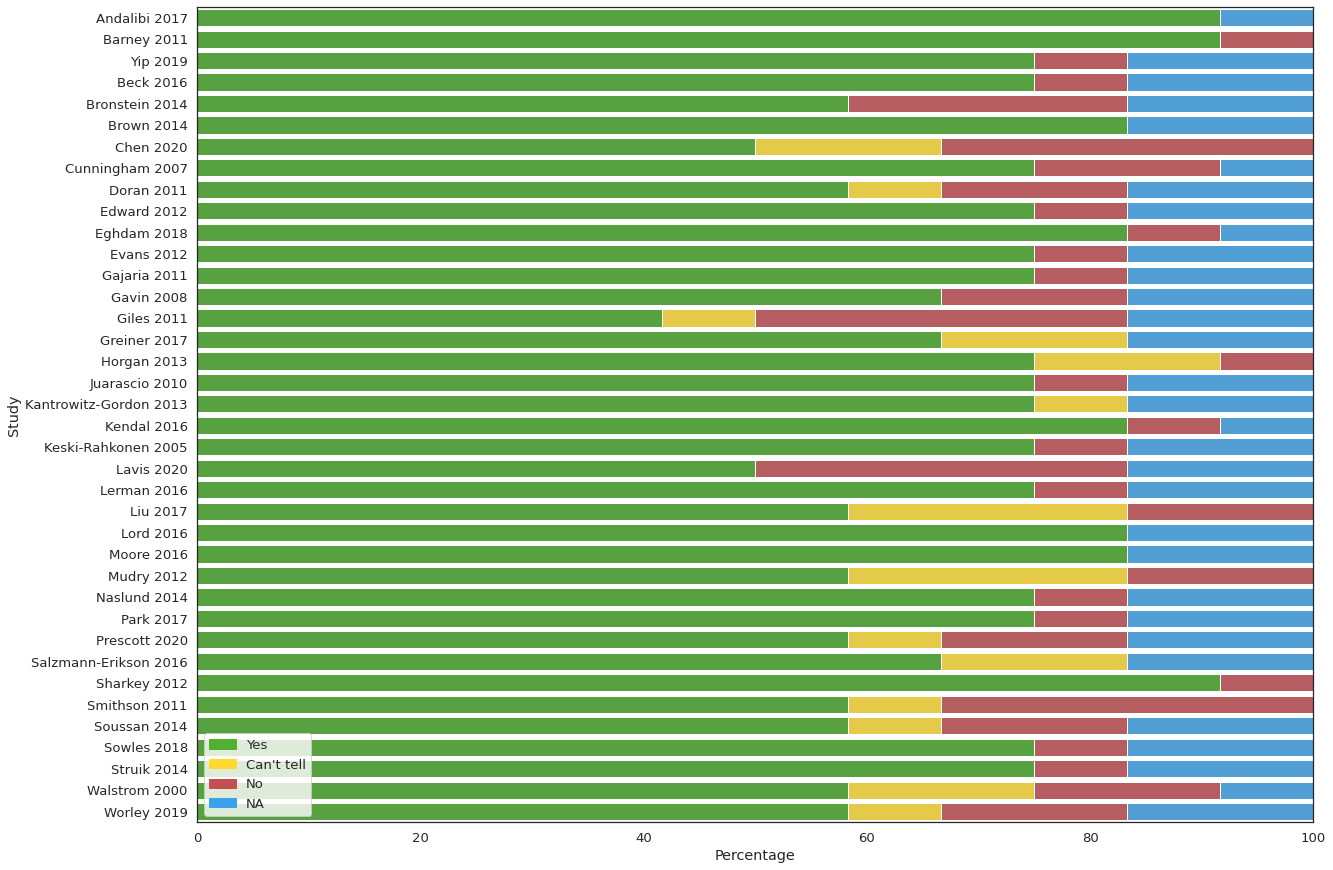

In [ ]:
plt.figure(figsize=(20, 15))

# sns.color_palette("pastel")

bar4 = sns.barplot(y="ID", x="NA_changed", data=df_casp_studies, color=sns.color_palette("husl", 9)[6])
bar2 = sns.barplot(y="ID", x="No_changed", data=df_casp_studies, color=sns.color_palette()[3])
bar3 = sns.barplot(y="ID", x="Can't tell_changed", data=df_casp_studies, color=sns.color_palette("Set2", 9)[5])
ax = bar1 = sns.barplot(y="ID", x="Yes_changed", data=df_casp_studies, color=sns.color_palette("husl", 9)[3])

leg_bar1 = mpatches.Patch(color=sns.color_palette("husl", 9)[3], label='Yes')
leg_bar2 = mpatches.Patch(color=sns.color_palette()[3], label='No')
leg_bar3 = mpatches.Patch(color=sns.color_palette("Set2", 9)[5], label='Can\'t tell')
leg_bar4 = mpatches.Patch(color=sns.color_palette("husl", 9)[6], label='NA')

plt.legend(handles=[leg_bar1, leg_bar3, leg_bar2, leg_bar4], loc='lower left')
ax.set(xlabel='Percentage', ylabel='Study')
ax.set(xlim=(0,100))

## clustermap

In [ ]:
iris = sns.load_dataset("iris")
iris.pop("species")
iris

sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

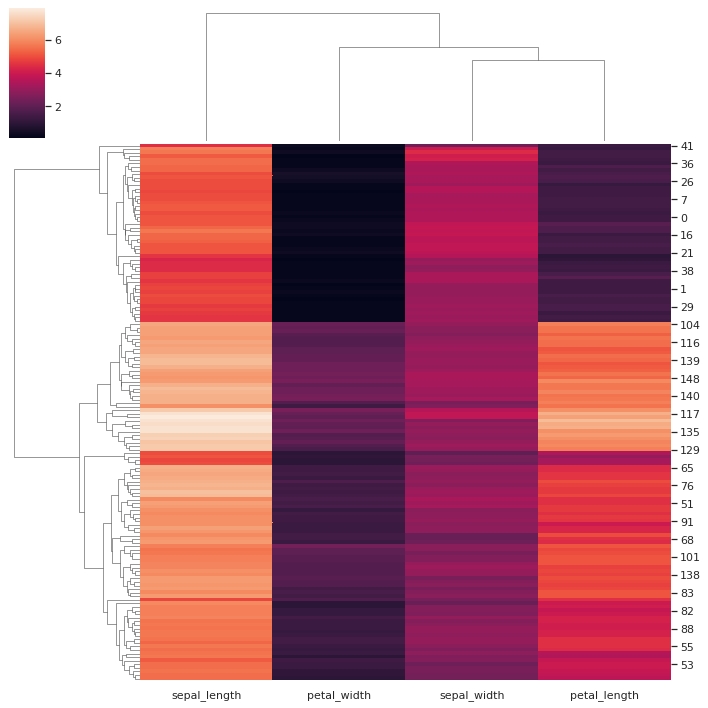

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)

iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris)

In [ ]:
df_cluster = pd.read_csv('heatmap-data.csv', sep=";")
df_cluster = df_cluster.drop(["ID", "illness-original", "illness-changed", "Illness-new-older", "illness-num"], axis=1)
df_cluster["Illness-new"] = df_cluster["Illness-new"].astype('category')
df_cluster.head()

instrumental  tangible  informational  ...  disagreement  rejection  Illness-new
0             1         0              1  ...             0          0   depression
1             0         1              1  ...             1          0   depression
2             0         0              0  ...             0          0   depression
3             0         0              0  ...             0          0          OCD
4             0         0              1  ...             0          1   addictions

[5 rows x 43 columns]

### correlation

In [ ]:
lut = {'depression':'0', 'OCD':'1', 'BD':'2', 'addictions':'3', 'ED':'4', 'other':'5', 'MCI':'6', 'PPD':'7', 'ADHD':'8', 'schizophrenia':'9', 'schizoaffective':'10', 'anxiety disorders':'11', 'PTSD':'12'}

In [ ]:
df_cluster["Illness-new"] = df_cluster["Illness-new"].map(lut)

In [ ]:
df_cluster.corr().to_csv()

',instrumental,tangible,informational,practical tricks,warnings,related to medication,related to professional help,related to side effects,acceptance,positive,negative,network,encouraging disclosure,requesting engagement,appreciation / gratitude,small talks / socializing,verification the authenticity,relationship,confidentiality,encouragement / motivation,spiritual,situation appraisal,presence / companion,request for other kinds of support,clarifications,apologizing,referring to the rules,agression,reluctance / aversion,tension release / jokes,illegal advices,request for information,empathy / compassion,offering hope,request for opinions / suggestions,compliment,sharing self disclosure,behaviors promotion,referral,sarcastic comments,disagreement,rejection\ninstrumental,1.0,0.019956144669641677,0.0060170040119319574,0.059868434008924935,-0.1534264276484303,0.20447131584993627,-0.14230081178013276,0.07387198368257747,0.1583969877704969,0.32461722703211776,0.03919309008348103,0.0905982365

In [ ]:
x = df_cluster.values

In [ ]:
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

TypeError: ignored

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
df_cluster = pd.read_csv('heatmap-data.csv', sep=";")
df_cluster = df_cluster.drop(["ID", "illness-original", "illness-changed", "Illness-new-older", "illness-num"], axis=1)
df_cluster["Illness-new"] = df_cluster["Illness-new"].astype('category')
data_encoded = df_cluster
data_encoded.head()

instrumental  tangible  informational  ...  disagreement  rejection  Illness-new
0             1         0              1  ...             0          0   depression
1             0         1              1  ...             1          0   depression
2             0         0              0  ...             0          0   depression
3             0         0              0  ...             0          0          OCD
4             0         0              1  ...             0          1   addictions

[5 rows x 43 columns]

In [ ]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    
    cramers = cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V 
    print("v1:", var1, "v2", var2, cramers) 
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

v1: instrumental v2 instrumental 0.9263540683153608
v1: instrumental v2 tangible 0.0
v1: instrumental v2 informational 0.0
v1: instrumental v2 practical tricks 0.0
v1: instrumental v2 warnings 0.0
v1: instrumental v2 related to medication 0.0
v1: instrumental v2 related to professional help 0.0
v1: instrumental v2 related to side effects 0.0
v1: instrumental v2 acceptance 0.0
v1: instrumental v2 positive 0.2110867846070168
v1: instrumental v2 negative 0.0
v1: instrumental v2 network 0.0
v1: instrumental v2 encouraging disclosure 0.0
v1: instrumental v2 requesting engagement 0.0
v1: instrumental v2 appreciation / gratitude 0.010556955943079897
v1: instrumental v2 small talks / socializing 0.3758832269995012
v1: instrumental v2 verification the authenticity 0.0
v1: instrumental v2 relationship 0.0
v1: instrumental v2 confidentiality 0.0
v1: instrumental v2 encouragement / motivation 0.0
v1: instrumental v2 spiritual 0.0
v1: instrumental v2 situation appraisal 0.0
v1: instrumental v2 pres

KeyboardInterrupt: ignored

### tree

In [ ]:
df_illness =  pd.read_csv('heatmap-data.csv', sep=";")
df_illness = df_illness["illness-new"]
df_illness.unique()

array(['depression and BD', 'OCD', 'addictions', 'ED', 'other',
       'dementia and MCI', 'PPD', 'ADHD', 'schizophrenia',
       'schizoaffective', 'anxiety disorders', 'PTSD'], dtype=object)

In [ ]:
lut = {'depression and BD':'red', 'OCD':'green', 'addictions':'yellow', 'ED':'blue', 'other':'darkgreen', 'dementia and MCI':'pink', 'PPD':'brown', 'ADHD':'orange', 'schizophrenia':'purple',
       'schizoaffective':'lightblue', 'anxiety disorders':'lightgreen', 'PTSD':'darkblue'}

In [ ]:
colors = df_illness.map(lut)
colors

0            red
1            red
2            red
3          green
4         yellow
5         yellow
6           blue
7      darkgreen
8           pink
9          brown
10        orange
11          blue
12     darkgreen
13        yellow
14           red
15          blue
16         brown
17          blue
18          blue
19           red
20        yellow
21          blue
22         brown
23        yellow
24           red
25        purple
26     lightblue
27           red
28    lightgreen
29      darkblue
30      darkblue
31     darkgreen
32     darkgreen
33     darkgreen
34          blue
35        yellow
36          blue
37          blue
38           red
39    lightgreen
Name: illness-new, dtype: object

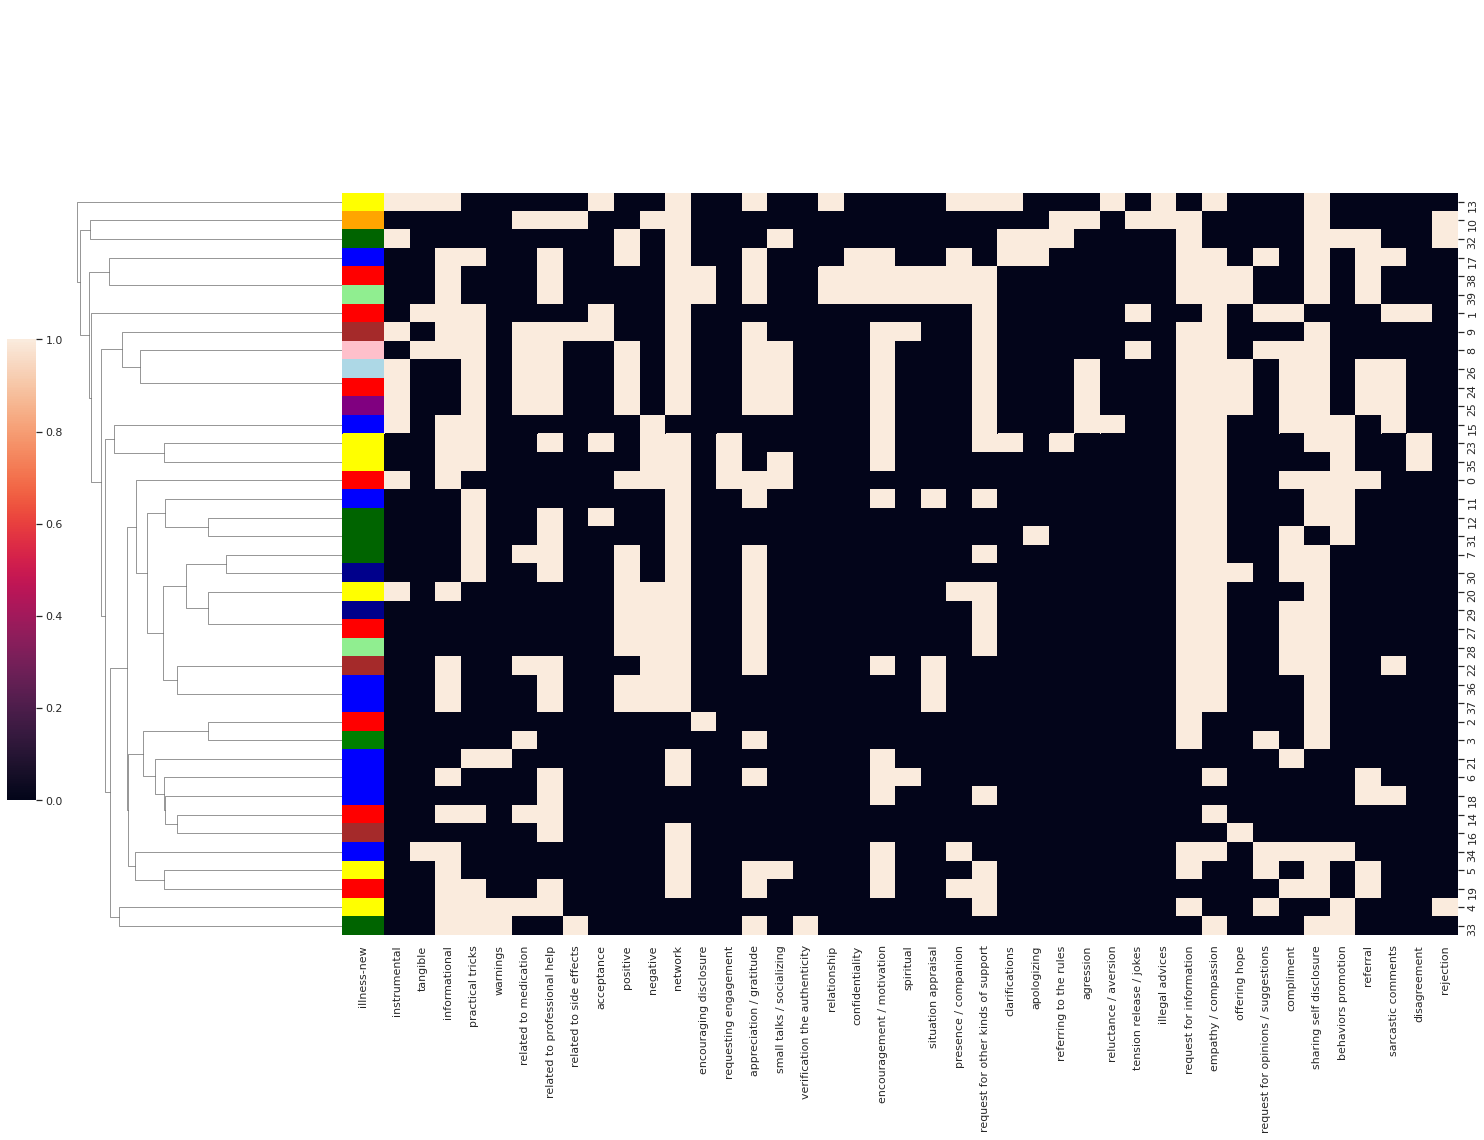

In [ ]:
# plt.figure(figsize=(40, 80))
sns.clustermap(df_cluster, col_cluster=False, figsize=(20,16), cbar_pos=(-0.03, .3, .02, .4), row_colors=colors)

In [ ]:
pal = sns.husl_palette(12, s=.45)
lut = dict(zip(df_illness.unique(), network_pal))


df_illness =  pd.read_csv('heatmap-data.csv', sep=";")
df_illness.index = 
df_illness = df_illness["illness-new"]
colors = df_illness.map(lut)
colors

0     (0.8167028311697733, 0.5345122109266688, 0.575...
1     (0.8167028311697733, 0.5345122109266688, 0.575...
2     (0.8167028311697733, 0.5345122109266688, 0.575...
3     (0.7847342610478556, 0.5614603111530924, 0.452...
4     (0.6813276573373218, 0.6029711581968916, 0.450...
5     (0.6813276573373218, 0.6029711581968916, 0.450...
6     (0.601243246823196, 0.6281411529879642, 0.4495...
7     (0.47974942417114835, 0.6571819677589695, 0.44...
8     (0.4597739872117063, 0.6525158000727045, 0.565...
9     (0.46712078684915886, 0.6454760674453914, 0.62...
10    (0.4742233215929232, 0.6384389499945919, 0.681...
11    (0.601243246823196, 0.6281411529879642, 0.4495...
12    (0.47974942417114835, 0.6571819677589695, 0.44...
13    (0.6813276573373218, 0.6029711581968916, 0.450...
14    (0.8167028311697733, 0.5345122109266688, 0.575...
15    (0.601243246823196, 0.6281411529879642, 0.4495...
16    (0.46712078684915886, 0.6454760674453914, 0.62...
17    (0.601243246823196, 0.6281411529879642, 0.

In [ ]:
df_illness =  pd.read_csv('heatmap-data.csv', sep=";")
df_illness.transpose()

0   ...                 39
ID                                      Andalibi 2017  ...           Yip 2019
instrumental                                        1  ...                  0
tangible                                            0  ...                  0
informational                                       1  ...                  1
practical tricks                                    0  ...                  0
warnings                                            0  ...                  0
related to medication                               0  ...                  0
related to professional help                        0  ...                  1
related to side effects                             0  ...                  0
acceptance                                          0  ...                  0
positive                                            1  ...                  0
negative                                            1  ...                  0
network                                             1  ...                  1
encouraging disclosure                              0  ...                  1
requesting engagement                               1  ...                  0
appreciation / gratitude                            1  ...                  1
small talks / socializing                           1  ...                  0
verification the authenticity                       0  ...                  0
relationship                                        0  ...                  1
confidentiality                                     0  ...                  1
encouragement / motivation                          0  ...                  1
spiritual                                           0  ...                  1
situation appraisal                                 0  ...                  1
presence / companion                                0  ...                  1
request for other kinds of support                  0  ...                  1
clarifications                                      0  ...                  0
apologizing                                         0  ...                  0
referring to the rules                              0  ...                  0
agression                                           0  ...                  0
reluctance / aversion                               0  ...                  0
tension release / jokes                             0  ...                  0
illegal advices                                     0  ...                  0
request for information                             1  ...                  1
empathy / compassion                                1  ...                  1
offering hope                                       0  ...                  1
request for opinions / suggestions                  0  ...                  0
compliment                                          1  ...                  0
sharing self disclosure                             1  ...                  1
behaviors promotion                                 1  ...                  0
referral                                            1  ...                  1
sarcastic comments                                  0  ...                  0
disagreement                                        0  ...                  0
rejection                                           0  ...                  0
illness-num                                         1  ...                  2
illness-original                           depression  ...            anxiety
illness-changed                            depression  ...  anxiety disorders
illness-new                         depression and BD  ...  anxiety disorders

[47 rows x 40 columns]

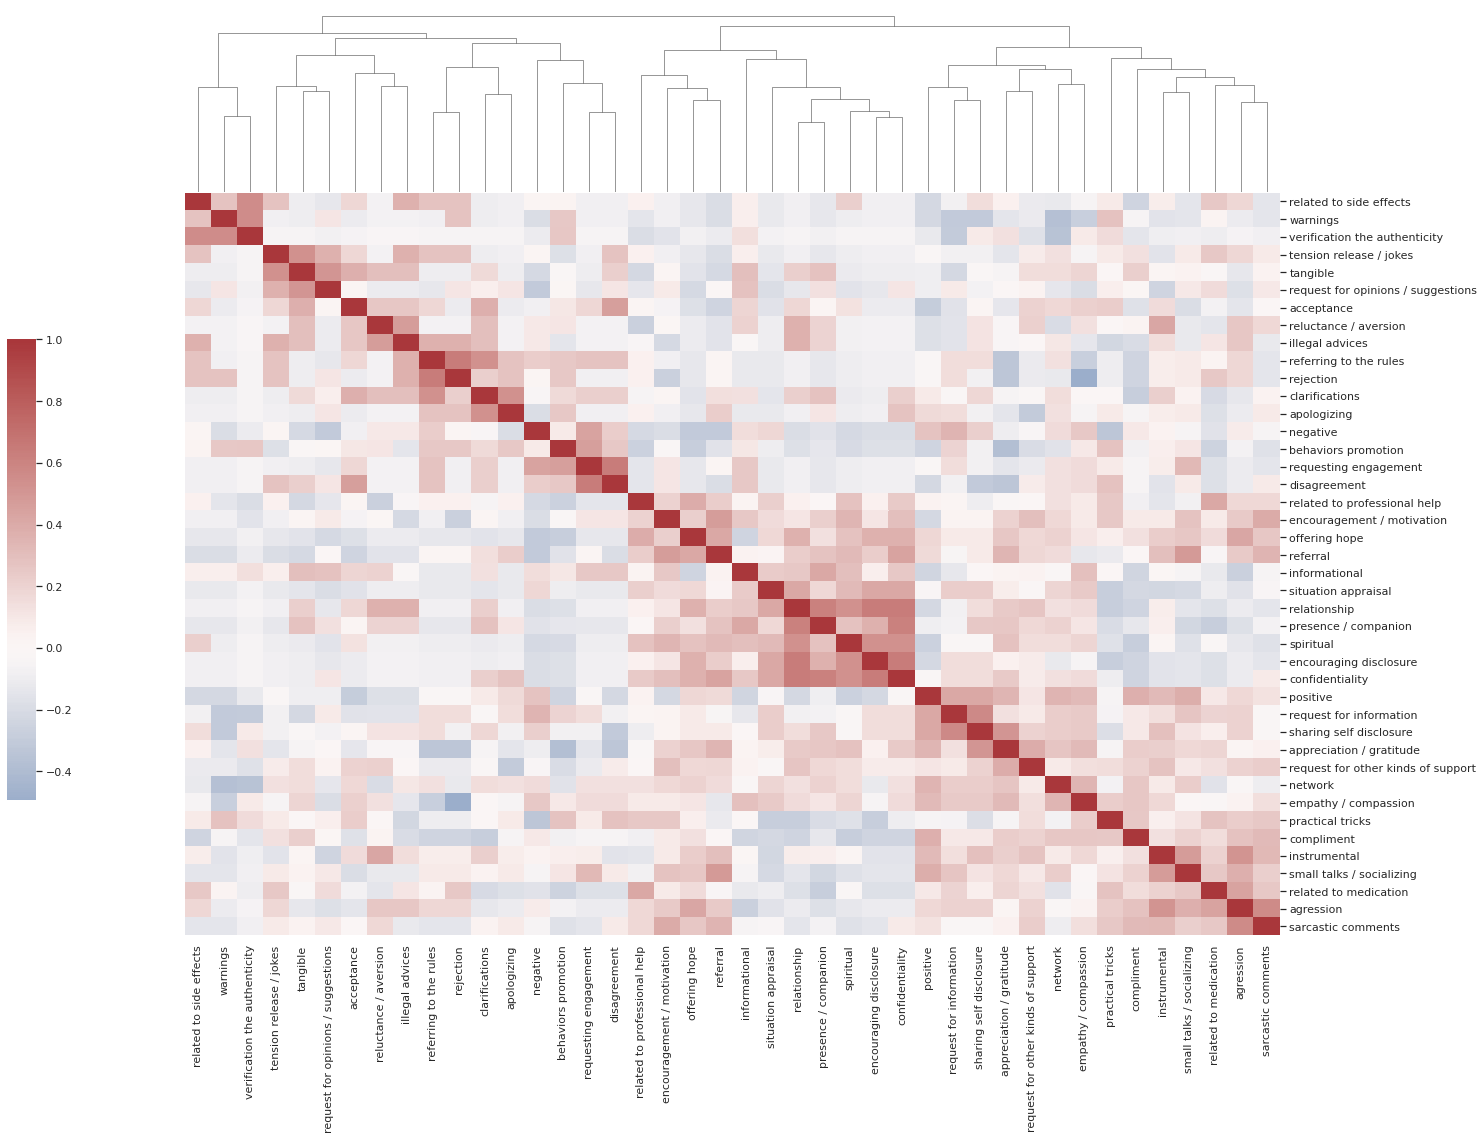

In [ ]:
g = sns.clustermap(df_cluster.corr(), center=0, figsize=(20,16), cbar_pos=(-0.03, .3, .02, .4), cmap="vlag", dendrogram_ratio=(.1, .2))
g.ax_row_dendrogram.remove()

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

network_colors

# # Draw the full plot
# g = sns.clustermap(df.corr(), center=0, cmap="vlag",
#                    row_colors=network_colors, col_colors=network_colors,
#                    dendrogram_ratio=(.1, .2),
#                    cbar_pos=(.02, .32, .03, .2),
#                    linewidths=.75, figsize=(12, 13))

# g.ax_row_dendrogram.remove()

network  node  hemi
1        1     lh      (0.8167028311697733, 0.5345122109266688, 0.575...
               rh      (0.8167028311697733, 0.5345122109266688, 0.575...
5        1     lh      (0.7256380093027939, 0.5865684184445076, 0.451...
               rh      (0.7256380093027939, 0.5865684184445076, 0.451...
6        1     lh      (0.601243246823196, 0.6281411529879642, 0.4495...
               rh      (0.601243246823196, 0.6281411529879642, 0.4495...
         2     lh      (0.601243246823196, 0.6281411529879642, 0.4495...
               rh      (0.601243246823196, 0.6281411529879642, 0.4495...
7        1     lh      (0.4542447259142938, 0.6576596537208662, 0.513...
               rh      (0.4542447259142938, 0.6576596537208662, 0.513...
         2     lh      (0.4542447259142938, 0.6576596537208662, 0.513...
               rh      (0.4542447259142938, 0.6576596537208662, 0.513...
         3     lh      (0.4542447259142938, 0.6576596537208662, 0.513...
               rh      (0.45424

In [ ]:
df.head()

network          1                     5  ...         17                       
node             1                     1  ...          3                      4
hemi            lh         rh         lh  ...         lh          rh         lh
0        56.055744  92.031036 -35.898861  ... -10.520872  120.490463 -39.686432
1        55.547253  43.690075  19.568010  ... -39.607521   24.764011 -36.771008
2        60.997768  63.438793  19.247454  ...  12.985169  -75.027451   6.434262
3        18.514868  12.657158  32.896915  ... -15.819172  -37.361431  -4.650954
4        -2.527392 -63.104668  18.396759  ...   5.453649    5.169828  87.809135

[5 rows x 38 columns]

## graph

### examples

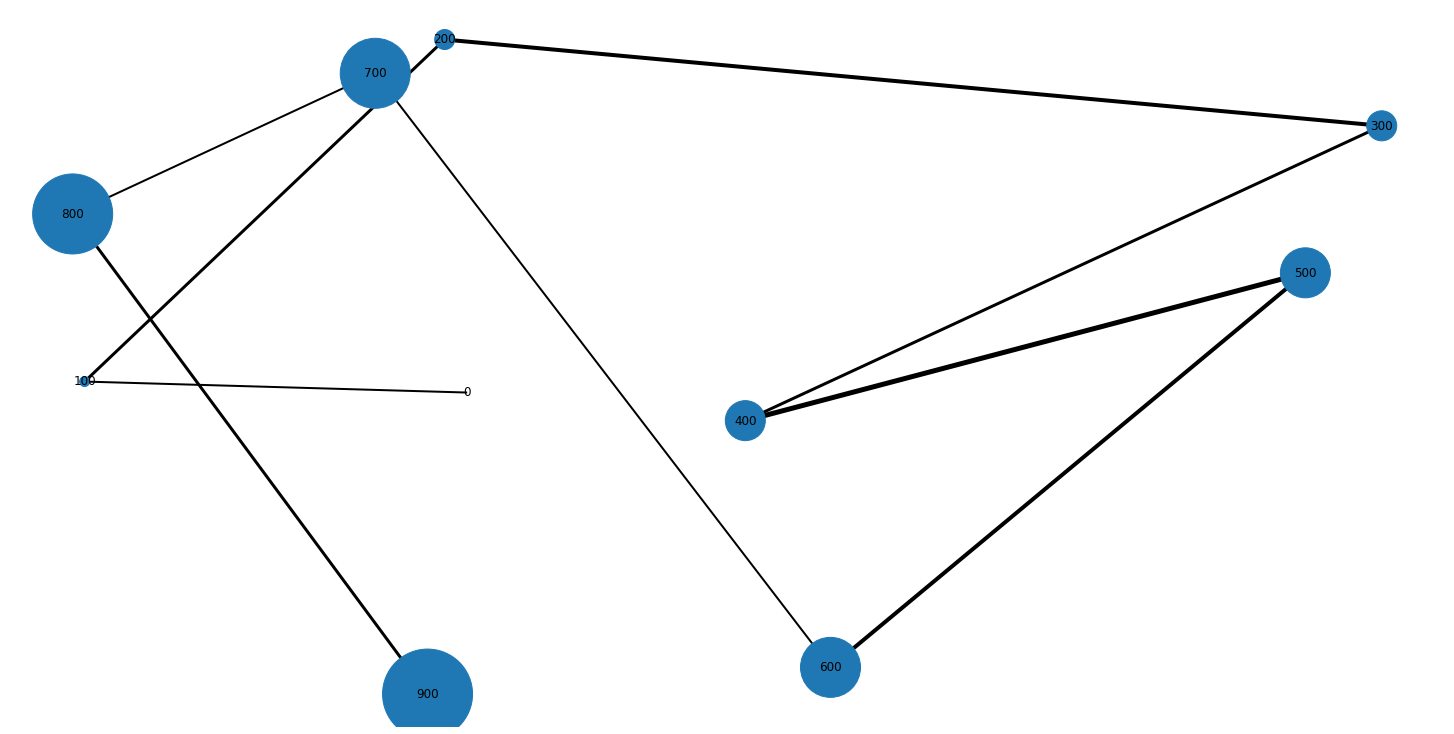

In [ ]:
import sys, networkx as nx, matplotlib.pyplot as plt
import random

# Create a list of 10 nodes numbered [0, 9]
nodes = range(10)
node_sizes = []
labels = {}
for n in nodes:
        node_sizes.append( 100 * n* n )
        labels[n] = 100 * n

# Node sizes: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

# Connect each node to its successor
edges = [ (i, i+1) for i in range(len(nodes)-1) ]

# Create the graph and draw it with the node labels
g = nx.Graph()
g.add_nodes_from(nodes)

for e1, e2 in edges:
  g.add_edge(e1, e2, weight=random.randint(1,5))

weights = [g[u][v]['weight'] for u,v in edges]

plt.figure(figsize=(20,10))
nx.draw_random(g, node_size = node_sizes, labels=labels, with_labels=True, width=weights)    
plt.show()


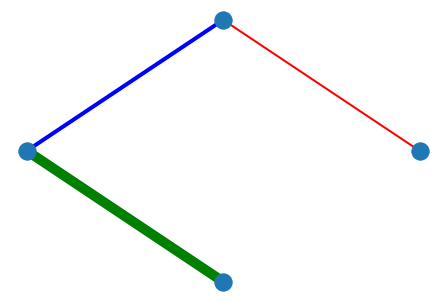

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edge(1,2,color='r',weight=2)
G.add_edge(2,3,color='b',weight=4)
G.add_edge(3,4,color='g',weight=10)

pos = nx.circular_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edge_color=colors, width=weights)

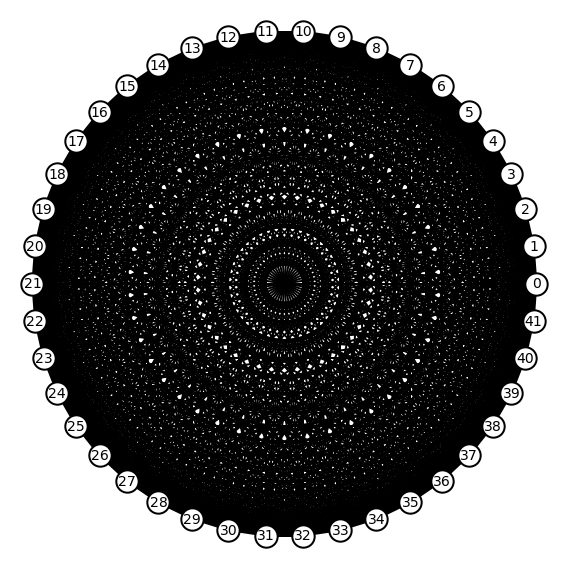

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# A rainbow color mapping using matplotlib's tableau colors
node_dist_to_color = {
    1: "tab:red",
    2: "tab:orange",
    3: "tab:olive",
    4: "tab:green",
    5: "tab:blue",
    6: "tab:purple",
    7: "tab:olive",
    8: "tab:red",
    9: "tab:orange",
    10: "tab:olive",
    11: "tab:green",
    12: "tab:blue",
    13: "tab:purple",
    14: "tab:olive",
    15: "tab:olive",
    16: "tab:red",
    17: "tab:orange",
    18: "tab:olive",
    19: "tab:green",
    20: "tab:blue",
    21: "tab:purple",
    22: "tab:olive",
}

# Create a complete graph with an odd number of nodes
nnodes = 42
G = nx.complete_graph(nnodes)

# A graph with (2n + 1) nodes requires n colors for the edges
n = (nnodes - 1) // 2
ndist_iter = list(range(1, n + 1))

# Take advantage of circular symmetry in determining node distances
ndist_iter += ndist_iter[::-1]


def cycle(nlist, n):
    return nlist[-n:] + nlist[:-n]


# Rotate nodes around the circle and assign colors for each edge based on
# node distance
nodes = list(G.nodes())
# for i, nd in enumerate(ndist_iter):
#     for u, v in zip(nodes, cycle(nodes, i + 1)):
#         G[u][v]["color"] = 'tab:blue'
#         # node_dist_to_color[nd]

pos = nx.circular_layout(G)
# Create a figure with 1:1 aspect ratio to preserve the circle.
fig, ax = plt.subplots(figsize=(8, 8))
node_opts = {"node_size": 500, "node_color": "w", "edgecolors": "k", "linewidths": 2.0}
nx.draw_networkx_nodes(G, pos, **node_opts)
nx.draw_networkx_labels(G, pos, font_size=14)
# Extract color from edge data
# edge_colors = [edgedata["color"] for _, _, edgedata in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=2.0)#, edge_color=edge_colors)

ax.set_axis_off()
fig.tight_layout()
plt.show()

### ours

In [3]:
df_graph = pd.read_csv(path_codes)
df_graph = df_graph.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1)
df_graph.head()

instrumental  tangible  ...  disagreement  rejection
0             1         0  ...             0          0
1             0         0  ...             0          0
2             0         1  ...             1          0
3             0         0  ...             0          0
4             0         0  ...             0          1

[5 rows x 42 columns]

In [4]:
no_disorders_analysed = 48

In [5]:
df_graph.describe().transpose()['mean'] * no_disorders_analysed

instrumental                           9.0
tangible                               4.0
informational                         27.0
practical tricks                      27.0
warnings                               3.0
related to medication                 17.0
related to professional help          29.0
related to side effects                4.0
acceptance                             5.0
positive                              15.0
negative                              12.0
network                               39.0
encouraging disclosure                 9.0
requesting engagement                  3.0
appreciation / gratitude              30.0
small talks / socializing              8.0
verification the authenticity          1.0
relationship                           3.0
confidentiality                        3.0
encouragement / motivation            21.0
spiritual                              4.0
situation appraisal                   13.0
presence / companion                   7.0
request for

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

cols = df_graph.columns

numbers = list(pd.factorize(df_graph.columns)[0] + 1)

cols = dict(zip(numbers, cols))

In [7]:
len(df_graph[(df_graph[cols[1]] == 1) & (df_graph[cols[5]] == 1)].index)

0

In [8]:
df_codes = pd.read_csv(path_graph_color)
cols = list(df_codes.code.values)
shorts = list(df_codes.short.values)

cols = dict(zip(shorts, cols))

In [9]:
cols

{'A1': 'referral',
 'A2': 'request for opinions / suggestions',
 'A3': 'situation appraisal',
 'B1': 'related to professional help',
 'B2': 'related to medication',
 'B3': 'related to side effects',
 'C1': 'sharing self disclosure',
 'D1': 'positive',
 'D2': 'negative',
 'E1': 'encouragement / motivation',
 'E2': 'compliment',
 'F1': 'practical tricks',
 'F2': 'instrumental',
 'F3': 'tangible',
 'G1': 'appreciation / gratitude',
 'H1': 'requesting engagement',
 'H2': 'request for other kinds of support',
 'H3': 'small talks / socializing',
 'H4': 'encouraging disclosure',
 'I1': 'informational',
 'I2': 'referring to the rules',
 'I3': 'illegal advices',
 'I4': 'warnings',
 'J1': 'request for information',
 'J2': 'clarifications',
 'J3': 'verification the authenticity',
 'K1': 'sarcastic comments',
 'K2': 'agression',
 'K3': 'disagreement',
 'K4': 'rejection',
 'K5': 'reluctance / aversion',
 'L1': 'presence / companion',
 'L2': 'offering hope',
 'L3': 'spiritual',
 'L4': 'tension relea

In [10]:
df_colors = pd.read_csv(path_graph_color)
colors = list(df_colors.color.values)
shorts = list(df_colors.short.values)

colors = dict(zip(shorts, colors))
colors['F1']

'lawngreen'

In [11]:
len(df_graph[(df_graph[cols['B1']] == 1) & (df_graph[cols['M1']] == 1)].index)

24

7 A1 A2
14 A1 B1
15 A1 C1
16 A1 O1
23 B1 C1
24 B1 J1
25 B1 O1
29 C1 G1
34 C1 J1


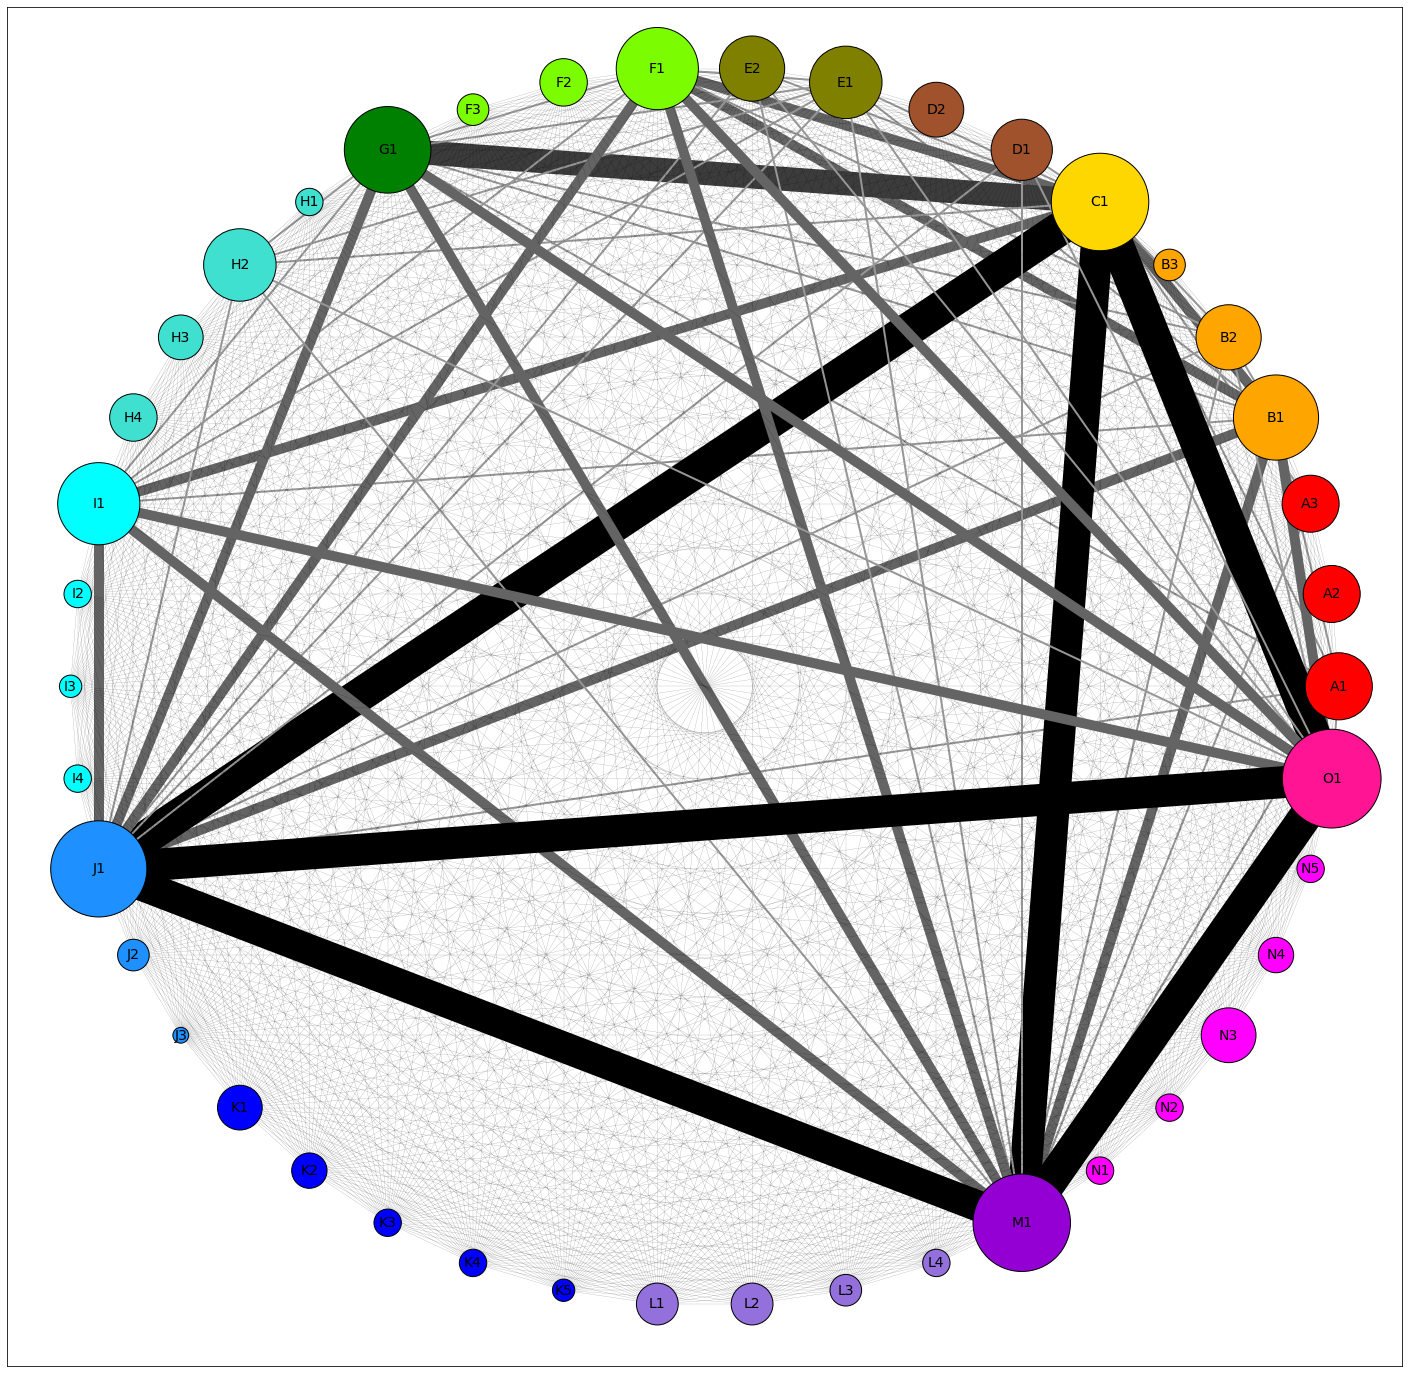

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

nnodes = len(df_graph.columns)

G = nx.Graph()
node_sizes = []
node_colors = []
edge_sizes = []
edge_colors = []
ws = []

sum = 0

first = []
second = []
weigh = []
colo = []

max_w = 0

for x in shorts:
  node_sizes.append(df_graph[cols[x]].sum()*250)
  node_colors.append(colors[x])

  for y in shorts:
    if x == y or ord(x[0]) > ord(y[0]) or (ord(x[0]) == ord(y[0]) and int(x[1]) > int(y[1])):
      continue

    w = len(df_graph[(df_graph[cols[x]] == 1) & (df_graph[cols[y]] == 1)].index)

    if w > max_w:
      max_w = w
      print(max_w,x,y)

    ws.append(w)

    ww = 0.1
    color = 'black'

    if w > 12:
      ww = 2
      color = '#969696'
    if w > 19:
      ww = 10
      color = '#646464'
    if w > 27:
      ww = 15
      color = '#323232'
    if w == 29:
      ww = 24
      color = '#3c3c3c'
    if w > 29:
      ww = w
      color = '#000000'
      # print(x, y, w)
      # continue

    first.append(x)
    second.append(y)
    weigh.append(ww)
    colo.append(color)

    G.add_edge(x, y, weight=ww)
    edge_sizes.append(ww)
    edge_colors.append(color)

# df = pd.DataFrame(list(zip(first, second, weigh, colo)), columns =['first', 'last', 'weight', 'colors'])
# df = df.sort_values('weight')

# for inx, row in df.iterrows():
#   G.add_edge(row['first'], row['last'], weight=row['weight'])
#   edge_sizes.append(row['weight'])
#   edge_colors.append(row['colors'])

# G.add_edge("J2", "B4")
# edge_sizes.append(28)
# edge_colors.append('#000000')

weights = edge_sizes

nodes = list(G.nodes())
pos = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(25, 25))

node_opts = {"edgecolors": "k", "linewidths": 1.0}

edge_colors = [w.replace('turqoise', 'turquoise') for w in edge_colors]
edge_colors = [w.replace('magneta', 'magenta') for w in edge_colors]
node_colors = [w.replace('magneta', 'magenta') for w in node_colors]

nx.draw_networkx_nodes(G, pos, nodelist=shorts, **node_opts, node_size=node_sizes, node_color=node_colors)
nx.draw_networkx_labels(G, pos, font_size=14, font_color='black')
nx.draw_networkx_edges(G, pos, width=weights, edge_color=edge_colors)

In [16]:
max_w

34

## ml

In [ ]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

### data

In [ ]:
df_dt = pd.read_csv(path_codes)
df_dt.head()
df_dt = df_dt.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1)
df_dt.head()

instrumental  tangible  ...  disagreement  rejection
0             1         0  ...             0          0
1             0         0  ...             0          0
2             0         1  ...             1          0
3             0         0  ...             0          0
4             0         0  ...             0          1

[5 rows x 42 columns]

In [ ]:
X = df_dt.values

df_dt = pd.read_csv(path_codes)

lut = {'DEP':'0', 'OCD':'1', 'PSU':'2', 'ED':'3', 'other':'4', 'MCI':'5', 'PPD':'6', 'ADHD':'7', 'SCZ':'8', 'SZA':'9', 'AXD':'10', 'PTSD':'11', 'BD':'12'}

y = df_dt['disorders-v5'].map(lut).astype(int).values

In [ ]:
X

array([[1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
y

array([ 0,  0,  0,  1,  2,  0,  2,  3,  4,  5,  6,  7,  3,  4,  2,  0,  3,
        6,  3,  3,  4,  0,  2,  3,  6,  2, 12,  8,  9,  0, 10, 11,  0, 12,
       10,  2,  4, 11,  4,  4,  4,  3,  2,  3,  3,  2,  0, 10])

### kMeans

In [ ]:
kmeans = KMeans(n_clusters=12, random_state=0).fit(X)
kmeans.labels_

array([ 0,  8,  3,  3,  8,  2,  2,  0,  1,  4,  3,  4,  4, 11,  8,  4,  8,
        9,  2,  2,  0,  2,  7,  6,  1,  1,  1,  0,  0,  0,  0,  8, 10,  8,
        4,  6,  7,  7,  5,  5], dtype=int32)

### decision trees

In [ ]:
col_names = df_dt.drop(["ID", 'disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1).columns
class_names = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

In [ ]:
col_names

Index(['instrumental', 'tangible', 'informational', 'practical tricks',
       'warnings', 'related to medication', 'related to professional help',
       'related to side effects', 'acceptance', 'positive', 'negative',
       'network', 'encouraging disclosure', 'requesting engagement',
       'appreciation / gratitude', 'small talks / socializing',
       'verification the authenticity', 'relationship', 'confidentiality',
       'encouragement / motivation', 'spiritual', 'situation appraisal',
       'presence / companion', 'request for other kinds of support',
       'clarifications', 'apologizing', 'referring to the rules', 'agression',
       'reluctance / aversion', 'tension release / jokes', 'illegal advices',
       'request for information', 'empathy / compassion', 'offering hope',
       'request for opinions / suggestions', 'compliment',
       'sharing self disclosure', 'behaviors promotion', 'referral',
       'sarcastic comments', 'disagreement', 'rejection'],
      dtype

In [ ]:
y

array([ 0,  0,  0,  1,  2,  0,  2,  3,  4,  5,  6,  7,  3,  4,  2,  0,  3,
        6,  3,  3,  4,  0,  2,  3,  6,  2, 12,  8,  9,  0, 10, 11,  0, 12,
       10,  2,  4, 11,  4,  4,  4,  3,  2,  3,  3,  2,  0, 10])

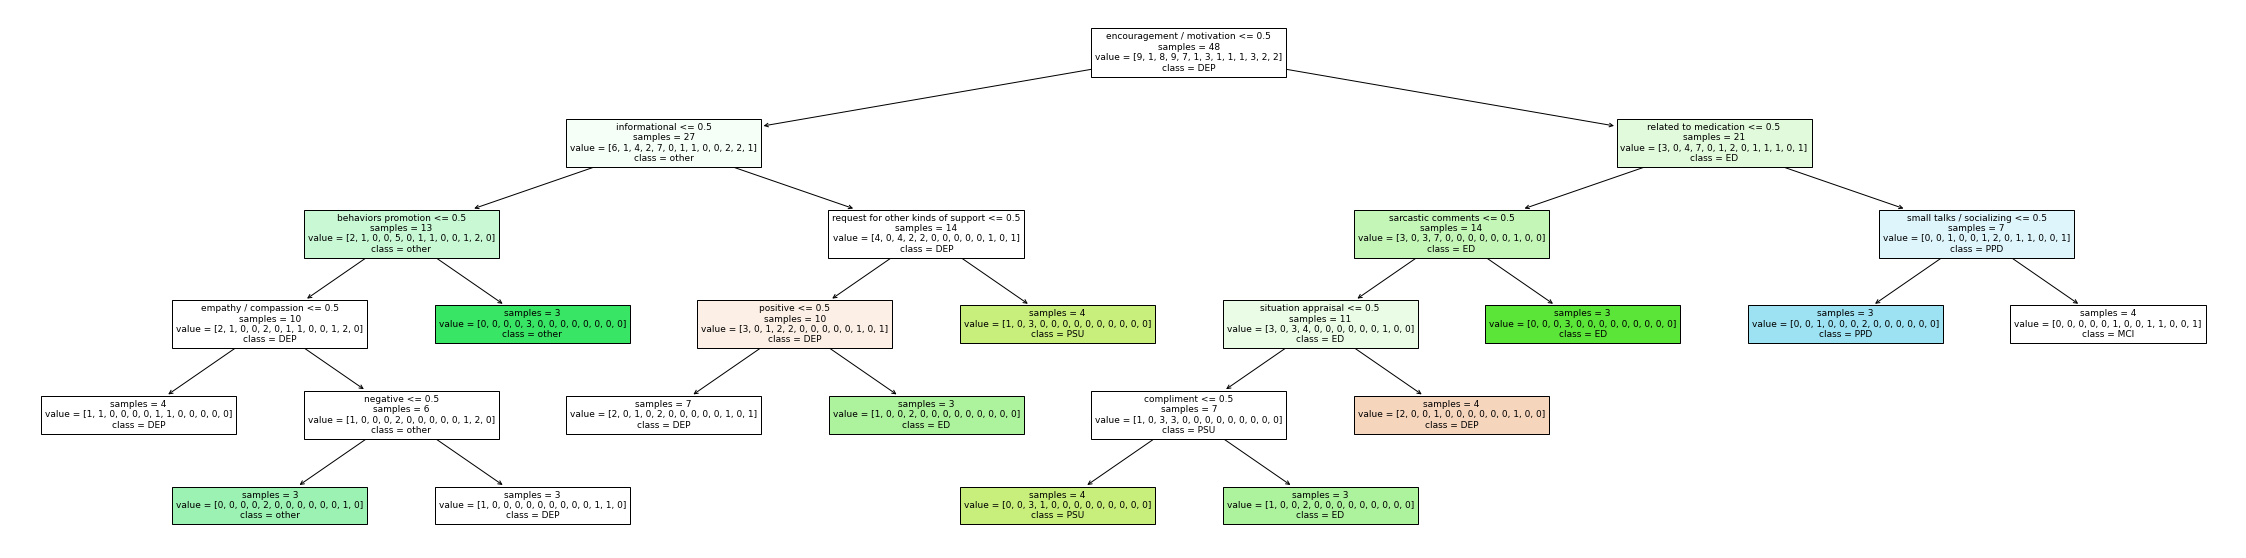

In [ ]:
clf = DecisionTreeClassifier(random_state=1234, min_samples_leaf=3)
clf = clf.fit(X, y)

fig = plt.figure(figsize=(40,10))
_ = tree.plot_tree(clf, 
                   feature_names=col_names,  
                   class_names=class_names,
                   filled=True, 
                   fontsize=9,
                  #  label='none',
                   impurity = False
                   )

tree_text = tree.export_graphviz(clf, feature_names=col_names, class_names=class_names, filled=True, impurity = False)

In [ ]:
tree_text = tree_text.replace("samples", "n")
tree_text = tree_text.replace("class = ", "")
tree_text = tree_text.replace(" <= 0.5", "?")
tree_text

# if '?' => remove all from valuye to end, set color to ffffff
# if not => remove from value to ']' & color change to dict


'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="encouragement / motivation?\\nn = 48\\nvalue = [9, 1, 8, 9, 7, 1, 3, 1, 1, 1, 3, 2, 2]\\nDEP", fillcolor="#ffffff"] ;\n1 [label="informational?\\nn = 27\\nvalue = [6, 1, 4, 2, 7, 0, 1, 1, 0, 0, 2, 2, 1]\\nother", fillcolor="#f6fef8"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="behaviors promotion?\\nn = 13\\nvalue = [2, 1, 0, 0, 5, 0, 1, 1, 0, 0, 1, 2, 0]\\nother", fillcolor="#c9f8d5"] ;\n1 -> 2 ;\n3 [label="empathy / compassion?\\nn = 10\\nvalue = [2, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0]\\nDEP", fillcolor="#ffffff"] ;\n2 -> 3 ;\n4 [label="n = 4\\nvalue = [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]\\nDEP", fillcolor="#ffffff"] ;\n3 -> 4 ;\n5 [label="negative?\\nn = 6\\nvalue = [1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0]\\nother", fillcolor="#ffffff"] ;\n3 -> 5 ;\n6 [label="n = 3\\nvalue = [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0]\\nother", fillcolor="#9cf2b2"] ;\n5 -> 6 ;\n7 [label="n = 3

In [ ]:
clf.score(X,y)

0.5625

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 0.5625


In [ ]:
from sklearn.metrics import confusion_matrix

df_confusion = confusion_matrix(y, y_pred)

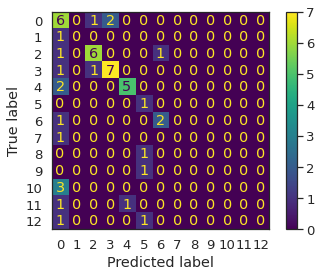

In [ ]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y)  
plt.show()  

Text(63.5, 0.5, 'Target class')

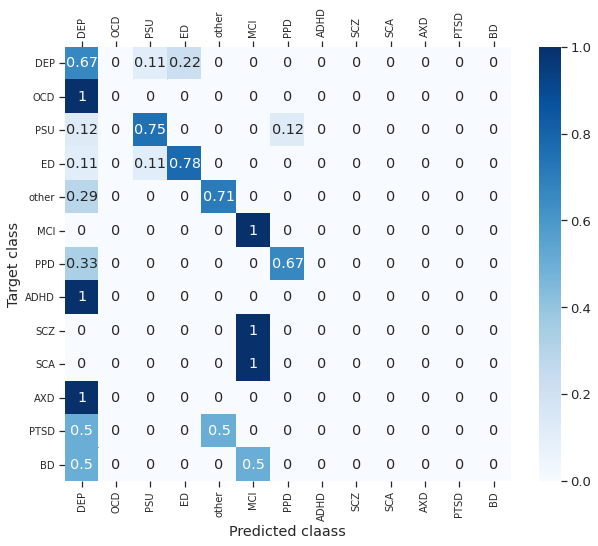

In [ ]:
df_confusion = confusion_matrix(y, y_pred)

labels = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

# sns.set(font_scale=1.2, style='white')

plt.subplots(figsize=(10,8))
sns.heatmap(df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis],  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")
# sns.heatmap(df_confusion,  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.xlabel('Predicted claass')
plt.ylabel('Target class')

In [ ]:
y_pred

array([ 0,  0,  0,  1,  2,  2,  3,  4,  5,  6,  7,  3,  4,  2,  0,  3,  6,
        3,  3,  0,  2,  3,  6,  2,  8,  8,  8,  0,  0,  0, 11,  4,  4,  4,
        3,  2,  3,  3,  0,  0])

In [ ]:
y

array([ 0,  0,  0,  1,  2,  2,  3,  4,  5,  6,  7,  3,  4,  2,  0,  3,  6,
        3,  3,  0,  2,  3,  6,  2, 12,  8,  9,  0, 10, 11, 11,  4,  4,  4,
        3,  2,  3,  3,  0, 10])

### logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression().fit(X, y)

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 0.8125


In [ ]:
clf.intercept_

array([ 2.75314791,  0.67374057,  0.88923042,  2.21837607,  2.04653552,
       -2.17329604,  0.82324463, -0.63380982, -2.06653988, -2.06653988,
       -0.57955781, -0.2806774 , -1.60385431])

Text(63.5, 0.5, 'Target class')

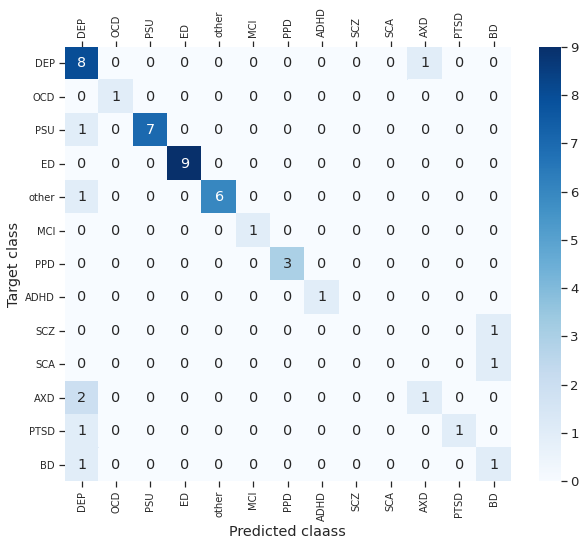

In [ ]:
df_confusion = confusion_matrix(y, y_pred)

labels = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

# sns.set(font_scale=1.2, style='white')

plt.subplots(figsize=(10,8))
# sns.heatmap(df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis],  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")
sns.heatmap(df_confusion,  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.xlabel('Predicted claass')
plt.ylabel('Target class')

### SVM

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(decision_function_shape='ovo')
# clf = svm.LinearSVC(multi_class='ovr')
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 0.6041666666666666


Text(63.5, 0.5, 'Target class')

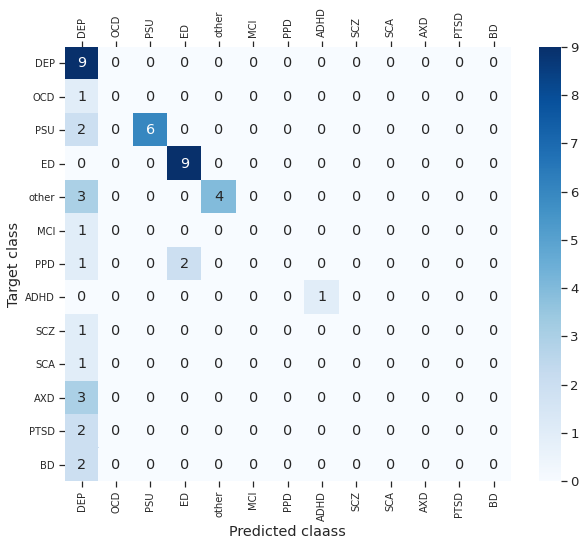

In [ ]:
df_confusion = confusion_matrix(y, y_pred)

labels = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

# sns.set(font_scale=1.2, style='white')

plt.subplots(figsize=(10,8))
# sns.heatmap(df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis],  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")
sns.heatmap(df_confusion,  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.xlabel('Predicted claass')
plt.ylabel('Target class')

### kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn import metrics

for x in range(1,34):
  clf = KNeighborsClassifier(n_neighbors=x)
  clf.fit(X, y)

  y_pred = clf.predict(X)
  print("k=", x, "Accuracy:", metrics.accuracy_score(y, y_pred))

k= 1 Accuracy: 0.8125
k= 2 Accuracy: 0.4375
k= 3 Accuracy: 0.3958333333333333
k= 4 Accuracy: 0.375
k= 5 Accuracy: 0.375
k= 6 Accuracy: 0.375
k= 7 Accuracy: 0.2916666666666667
k= 8 Accuracy: 0.20833333333333334
k= 9 Accuracy: 0.1875
k= 10 Accuracy: 0.16666666666666666
k= 11 Accuracy: 0.20833333333333334
k= 12 Accuracy: 0.20833333333333334
k= 13 Accuracy: 0.22916666666666666
k= 14 Accuracy: 0.25
k= 15 Accuracy: 0.20833333333333334
k= 16 Accuracy: 0.16666666666666666
k= 17 Accuracy: 0.16666666666666666
k= 18 Accuracy: 0.14583333333333334
k= 19 Accuracy: 0.14583333333333334
k= 20 Accuracy: 0.16666666666666666
k= 21 Accuracy: 0.14583333333333334
k= 22 Accuracy: 0.125
k= 23 Accuracy: 0.1875
k= 24 Accuracy: 0.20833333333333334
k= 25 Accuracy: 0.16666666666666666
k= 26 Accuracy: 0.1875
k= 27 Accuracy: 0.1875
k= 28 Accuracy: 0.1875
k= 29 Accuracy: 0.22916666666666666
k= 30 Accuracy: 0.22916666666666666
k= 31 Accuracy: 0.1875
k= 32 Accuracy: 0.16666666666666666
k= 33 Accuracy: 0.125


Text(63.5, 0.5, 'Target class')

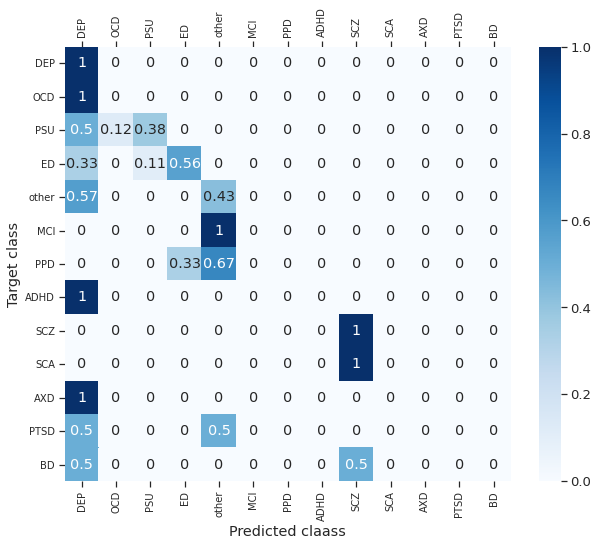

In [ ]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(X, y)

y_pred = clf.predict(X)

df_confusion = confusion_matrix(y, y_pred)

labels = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

# sns.set(font_scale=1.2, style='white')

plt.subplots(figsize=(10,8))
sns.heatmap(df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis],  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")
# sns.heatmap(df_confusion,  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.xlabel('Predicted claass')
plt.ylabel('Target class')

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf = GaussianNB()
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
from sklearn import metrics

y_pred = clf.predict(X)
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Accuracy: 0.6458333333333334


Text(63.5, 0.5, 'Target class')

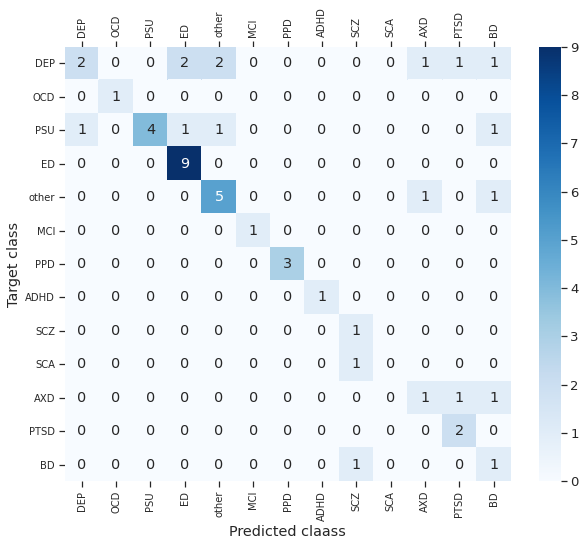

In [ ]:
df_confusion = confusion_matrix(y, y_pred)

labels = ['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'SCZ', 'SCA', 'AXD', 'PTSD', 'BD']

# sns.set(font_scale=1.2, style='white')

plt.subplots(figsize=(10,8))
# sns.heatmap(df_confusion.astype('float') / df_confusion.sum(axis=1)[:, np.newaxis],  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")
sns.heatmap(df_confusion,  annot=True, xticklabels = labels, yticklabels = labels, cmap="Blues")

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = True, bottom=True, top = True, labeltop=True, left=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0) 

plt.xlabel('Predicted claass')
plt.ylabel('Target class')

## correlations

#### codes - all

In [ ]:
from scipy.stats import pearsonr
import numpy as np

In [ ]:
df = pd.read_csv(path_codes)
df = df.drop(['disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1)
df.head()

ID  instrumental  ...  disagreement  rejection
0   Andalibi 2017             1  ...             0          0
1     Barney 2011             0  ...             0          0
2       Beck 2016             0  ...             1          0
3  Bronstein 2014             0  ...             0          0
4      Brown 2014             0  ...             0          1

[5 rows x 43 columns]

In [ ]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

(rho.round(2).astype(str) + p).to_csv()

# pearsonr(df['warnings'], df['practical tricks'])

',instrumental,tangible,informational,practical tricks,warnings,related to medication,related to professional help,related to side effects,acceptance,positive,negative,network,encouraging disclosure,requesting engagement,appreciation / gratitude,small talks / socializing,verification the authenticity,relationship,confidentiality,encouragement / motivation,spiritual,situation appraisal,presence / companion,request for other kinds of support,clarifications,apologizing,referring to the rules,agression,reluctance / aversion,tension release / jokes,illegal advices,request for information,empathy / compassion,offering hope,request for opinions / suggestions,compliment,sharing self disclosure,behaviors promotion,referral,sarcastic comments,disagreement,rejection\ninstrumental,1.0***,0.05,-0.01,-0.01,-0.12,0.09,-0.16,0.05,0.19,0.37*,0.09,0.09,-0.23,0.1,0.15,0.5***,-0.07,0.1,-0.12,0.11,0.05,-0.29*,0.1,0.33*,0.24,0.1,0.1,0.54***,0.43**,-0.12,0.17,0.13,0.12,0.26,-0.29*,0.2,0.25,0.09,0.18,0.36*,-0

#### codes - different disorders + quality

In [ ]:
df = pd.read_csv(path_codes)
df['disorders-v5'].unique()

array(['DEP', 'OCD', 'PSU', 'ED', 'other', 'MCI', 'PPD', 'ADHD', 'BD',
       'SCZ', 'SZA', 'AXD', 'PTSD'], dtype=object)

In [ ]:
df = pd.read_csv(path_codes)
# df = df[df['disorders-v5'] == 'PSU']
df = df.drop(['disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1)

high_quality = ['Andalibi 2017', 'Beck 2016', 'Barney 2011', 'Brown 2014', 'Cunningham 2007', 'Greiner 2017', 'Horgan 2013', 'Kantrowitz-Gordon 2013', 'Lord 2016', 'Moore 2016', 'Salzmann-Erikson 2016', 'Struik 2014', 'Walstrom 2000']
df = df[~df['ID'].isin(high_quality)]

print(df.shape)

print(list(df.columns[(df == 0).all()]))
print(list(df.columns[(df == 1).all()]))

(34, 43)
[]
[]


In [ ]:
df.head()

ID  instrumental  ...  disagreement  rejection
3  Bronstein 2014             0  ...             0          0
5       Chen 2020             0  ...             0          0
7      Doran 2011             0  ...             0          0
8     Edward 2012             0  ...             0          0
9     Eghdam 2018             0  ...             0          0

[5 rows x 43 columns]

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]
df = df.loc[:, (df != 1).any(axis=0)]

rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

(rho.round(2).astype(str) + p).to_csv()

',instrumental,tangible,informational,practical tricks,warnings,related to medication,related to professional help,related to side effects,acceptance,positive,negative,network,encouraging disclosure,requesting engagement,appreciation / gratitude,small talks / socializing,verification the authenticity,relationship,confidentiality,encouragement / motivation,spiritual,situation appraisal,presence / companion,request for other kinds of support,clarifications,apologizing,referring to the rules,agression,reluctance / aversion,tension release / jokes,illegal advices,request for information,empathy / compassion,offering hope,request for opinions / suggestions,compliment,sharing self disclosure,behaviors promotion,referral,sarcastic comments,disagreement,rejection\ninstrumental,1.0***,-0.13,-0.07,0.1,-0.09,0.17,-0.08,0.04,0.1,0.43*,0.1,0.04,-0.28,-0.09,-0.02,0.61***,-0.09,-0.13,-0.16,0.22,0.04,-0.33,-0.04,0.36*,0.1,0.1,0.1,0.61***,0.34*,-0.13,-0.09,0.24,0.01,0.4*,-0.33,0.23,0.19,0.02,0.1,0.53**

#### codes x disorderds

In [ ]:
df = pd.read_csv(path_codes)

one_hot = pd.get_dummies(df['disorders-v5'])
df = df.join(one_hot)

df = df.drop(['disorders-original', 'disorders-v1', 'disorders-v2', 'disorders-v3', 'disorders-v4', 'disorders-v5', 'illness-num'], axis=1)

high_quality = ['Andalibi 2017', 'Beck 2016', 'Barney 2011', 'Brown 2014', 'Cunningham 2007', 'Greiner 2017', 'Horgan 2013', 'Kantrowitz-Gordon 2013', 'Lord 2016', 'Moore 2016', 'Salzmann-Erikson 2016', 'Struik 2014', 'Walstrom 2000']
df = df[~df['ID'].isin(high_quality)]

print(list(df.columns[(df == 0).all()]))
print(list(df.columns[(df == 1).all()]))

[]
[]


In [ ]:
df.head()

ID  instrumental  tangible  informational  ...  PTSD  SCZ  SZA  other
3  Bronstein 2014             0         0              0  ...     0    0    0      0
5       Chen 2020             0         0              0  ...     0    0    0      0
7      Doran 2011             0         0              1  ...     0    0    0      0
8     Edward 2012             0         0              0  ...     0    0    0      1
9     Eghdam 2018             0         1              1  ...     0    0    0      0

[5 rows x 56 columns]

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]
df = df.loc[:, (df != 1).any(axis=0)]

rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))

(rho.round(2).astype(str) + p).to_csv()

',instrumental,tangible,informational,practical tricks,warnings,related to medication,related to professional help,related to side effects,acceptance,positive,negative,network,encouraging disclosure,requesting engagement,appreciation / gratitude,small talks / socializing,verification the authenticity,relationship,confidentiality,encouragement / motivation,spiritual,situation appraisal,presence / companion,request for other kinds of support,clarifications,apologizing,referring to the rules,agression,reluctance / aversion,tension release / jokes,illegal advices,request for information,empathy / compassion,offering hope,request for opinions / suggestions,compliment,sharing self disclosure,behaviors promotion,referral,sarcastic comments,disagreement,rejection,ADHD,AXD,BD,DEP,ED,MCI,OCD,PPD,PSU,PTSD,SCZ,SZA,other\ninstrumental,1.0***,-0.13,-0.07,0.1,-0.09,0.17,-0.08,0.04,0.1,0.43*,0.1,0.04,-0.28,-0.09,-0.02,0.61***,-0.09,-0.13,-0.16,0.22,0.04,-0.33,-0.04,0.36*,0.1,0.1,0.1,0.61***,0.34*,-0.1